**MAESTRÍA EN INTELIGENCIA ARTIFICIAL  APLICADA**

**Curso: TC5044 - Operaciones de aprendizaje automático (MLOps)**

**Tecnológico de Monterrey**

Dr. Gerardo Rodríguez Hernández

Prof. José Ángel Martínez Navarro

**Semana 5**
Fase 1 | Avance de Proyecto

**Equipo 18**
- Ali Mateo Campos Martínez      A01796071
- Mario Fonseca Martínez         A01795228
- Miguel Ángel Hernández Núñez   A01795751
- Jonatan Israel Meza Mendoza    A01275322
- Eder Mauricio Castillo Galindo A01795453

---

In [2]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
# Cargar dataset modificado
df = pd.read_csv("../data/raw/turkish_music_emotion_modified.csv")

# Revisar primeras filas
df.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy,mixed_type_col
0,relax,0.052,NaN,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.97,979
1,relax,0.125,0.439,6.680,142.24,4.058,0.516,0.785,0.397,0.556,...,1.000,0.0,0.984,0.285,0.211,-0.082,3.364,0.702,0.967,943
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.746,0.016,1.0,0.413,28.105999999999998,0.134,1.682,0.692,0.963,628
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,1.000,0.161,0.757,error,0.265,0.042,0.354,0.743,0.968,192
4,relax,0.066,0.591,9.769,88.89,3.217,0.228,0.814,0.096,0.434,...,0.404,1.0,0.001,0.345,0.261,0.089,0.748,0.674,0.957,292


# **Tarea 2 y 3**. Manipulación, preparación, exploración y preprocesamiento de datos

## **Parte 1**. Análisis descriptivo (univariante)

In [6]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 52 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           403 non-null    object 
 1   _RMSenergy_Mean                                 401 non-null    object 
 2   _Lowenergy_Mean                                 404 non-null    float64
 3   _Fluctuation_Mean                               405 non-null    float64
 4   _Tempo_Mean                                     401 non-null    object 
 5   _MFCC_Mean_1                                    402 non-null    float64
 6   _MFCC_Mean_2                                    403 non-null    float64
 7   _MFCC_Mean_3                                    397 non-null    object 
 8   _MFCC_Mean_4                                    402 non-null    object 
 9   _MFCC_Mean_5                               

In [7]:
# Contar cuántas son object (texto/categorías)
num_object = df.select_dtypes(include="object")

# Contar cuántas son numéricas
num_numeric = df.select_dtypes(include="number")

print(f"Columnas tipo object: {num_object.shape[1]}")
print(f"Columnas numéricas: {num_numeric.shape[1]}")

Columnas tipo object: 38
Columnas numéricas: 14


In [8]:
# Porcentaje (%) de valores faltantes por columna
df.isna().sum().mul(100).div(len(df)).sort_values(ascending=False)

mixed_type_col                                    9.313725
_MFCC_Mean_11                                     2.696078
_MFCC_Mean_3                                      2.696078
_MFCC_Mean_5                                      1.960784
_Spectralcentroid_Mean                            1.960784
_MFCC_Mean_12                                     1.960784
_HarmonicChangeDetectionFunction_Mean             1.960784
_Pulseclarity_Mean                                1.715686
_RMSenergy_Mean                                   1.715686
_Tempo_Mean                                       1.715686
_HarmonicChangeDetectionFunction_Slope            1.715686
_MFCC_Mean_4                                      1.470588
_MFCC_Mean_1                                      1.470588
_MFCC_Mean_10                                     1.470588
_Spectralskewness_Mean                            1.470588
_AttackTime_Slope                                 1.470588
_Chromagram_Mean_7                                1.4705

### Análisis de variables numéricas

In [10]:
# Estadística descriptiva
df.describe().T

,count,mean,std,min,25%,50%,75%,max
_Lowenergy_Mean,404.0,4.241829,50.714118,0.302,0.52300,0.5535,0.58500,805.528
_Fluctuation_Mean,405.0,9.711723,32.204572,3.987,5.85200,6.7450,7.83800,483.105
_MFCC_Mean_1,402.0,6.270055,37.120651,0.423,1.95875,2.4200,2.90000,565.490
_MFCC_Mean_2,403.0,7.599908,77.807229,-43.608,-0.26700,0.0650,0.41350,946.483
_MFCC_Mean_13,406.0,1.004042,19.712898,-0.620,-0.04400,0.0390,0.10500,397.220
_AttackTime_Slope,402.0,4.055219,49.192974,-0.465,-0.09300,0.0100,0.08975,732.036
_Eventdensity_Mean,405.0,8.865998,67.375263,0.234,1.73700,2.7730,3.74200,998.241
_Pulseclarity_Mean,401.0,4.355584,49.896492,0.011,0.13000,0.2180,0.33100,794.363
_Spectralcentroid_Mean,400.0,4625.624853,21765.211883,606.524,1983.39500,2547.6780,3179.98675,318051.072
_Chromagram_Mean_3,405.0,2.682472,45.699208,0.000,0.08300,0.2990,0.59500,920.000


In [11]:
# Forma (asimetría)
df.skew(numeric_only=True).sort_values(ascending=False)
# Todas las variables numéricas tienen sesgo positivo, es decir su promedio es mayor que la moda.

_MFCC_Mean_13                                  20.147970
_Chromagram_Mean_3                             20.118656
_Chromagram_Mean_10                            20.045608
_Lowenergy_Mean                                14.444717
_Chromagram_Mean_9                             14.111677
_Pulseclarity_Mean                             13.526342
_Fluctuation_Mean                              13.223509
_AttackTime_Slope                              12.887338
_Eventdensity_Mean                             12.461290
_MFCC_Mean_1                                   12.268594
_Spectralcentroid_Mean                         11.943330
_HarmonicChangeDetectionFunction_PeriodFreq    11.703957
_MFCC_Mean_2                                   10.380621
_Chromagram_Mean_6                              1.134205
dtype: float64

In [12]:
# Forma (curtosis)
df.kurt(numeric_only=True).sort_values(ascending=False)

_MFCC_Mean_13                                  405.960372
_Chromagram_Mean_3                             404.839071
_Chromagram_Mean_10                            402.209418
_Lowenergy_Mean                                211.045891
_Chromagram_Mean_9                             198.469578
_Pulseclarity_Mean                             192.842101
_Fluctuation_Mean                              180.148383
_AttackTime_Slope                              171.826077
_Eventdensity_Mean                             164.068311
_MFCC_Mean_1                                   163.872334
_Spectralcentroid_Mean                         150.161041
_HarmonicChangeDetectionFunction_PeriodFreq    143.717906
_MFCC_Mean_2                                   109.020740
_Chromagram_Mean_6                               0.253010
dtype: float64

In [13]:
def plot_numeric_eda(df: pd.DataFrame, bins: int = 20) -> None:
    """
    Genera histogramas y boxplots para todas las columnas numéricas del DataFrame.
    - Detecta automáticamente las columnas numéricas.
    - Muestra en pantalla ambas visualizaciones.

    Parámetros:
        df (pd.DataFrame): DataFrame a analizar
        bins (int): número de intervalos para los histogramas
    """
    numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()

    if not numeric_cols:
        print("No se encontraron columnas numéricas en el DataFrame!")
        return

    #print(f"Columnas numéricas detectadas ({len(numeric_cols)}): {numeric_cols}\n")

    # --- Histogramas ---
    print("Distribución de variables numéricas (Histogramas)")
    df[numeric_cols].hist(
        figsize=(15, 10),
        bins=bins,
        color="skyblue",
        edgecolor="black"
    )
    plt.suptitle("Distribución de variables numéricas", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # --- Boxplots ---
    print("\nDispersión y posibles outliers (Boxplots)")
    df[numeric_cols].plot(
        kind="box",
        subplots=True,
        layout=(max(1, len(numeric_cols) // 3 + 1), 3),
        figsize=(15, 16),
        sharex=False,
        sharey=False,
        vert=False,
        color=dict(boxes="blue", whiskers="black", medians="red", caps="gray")
    )
    plt.suptitle("Boxplots de variables numéricas", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Distribución de variables numéricas (Histogramas)


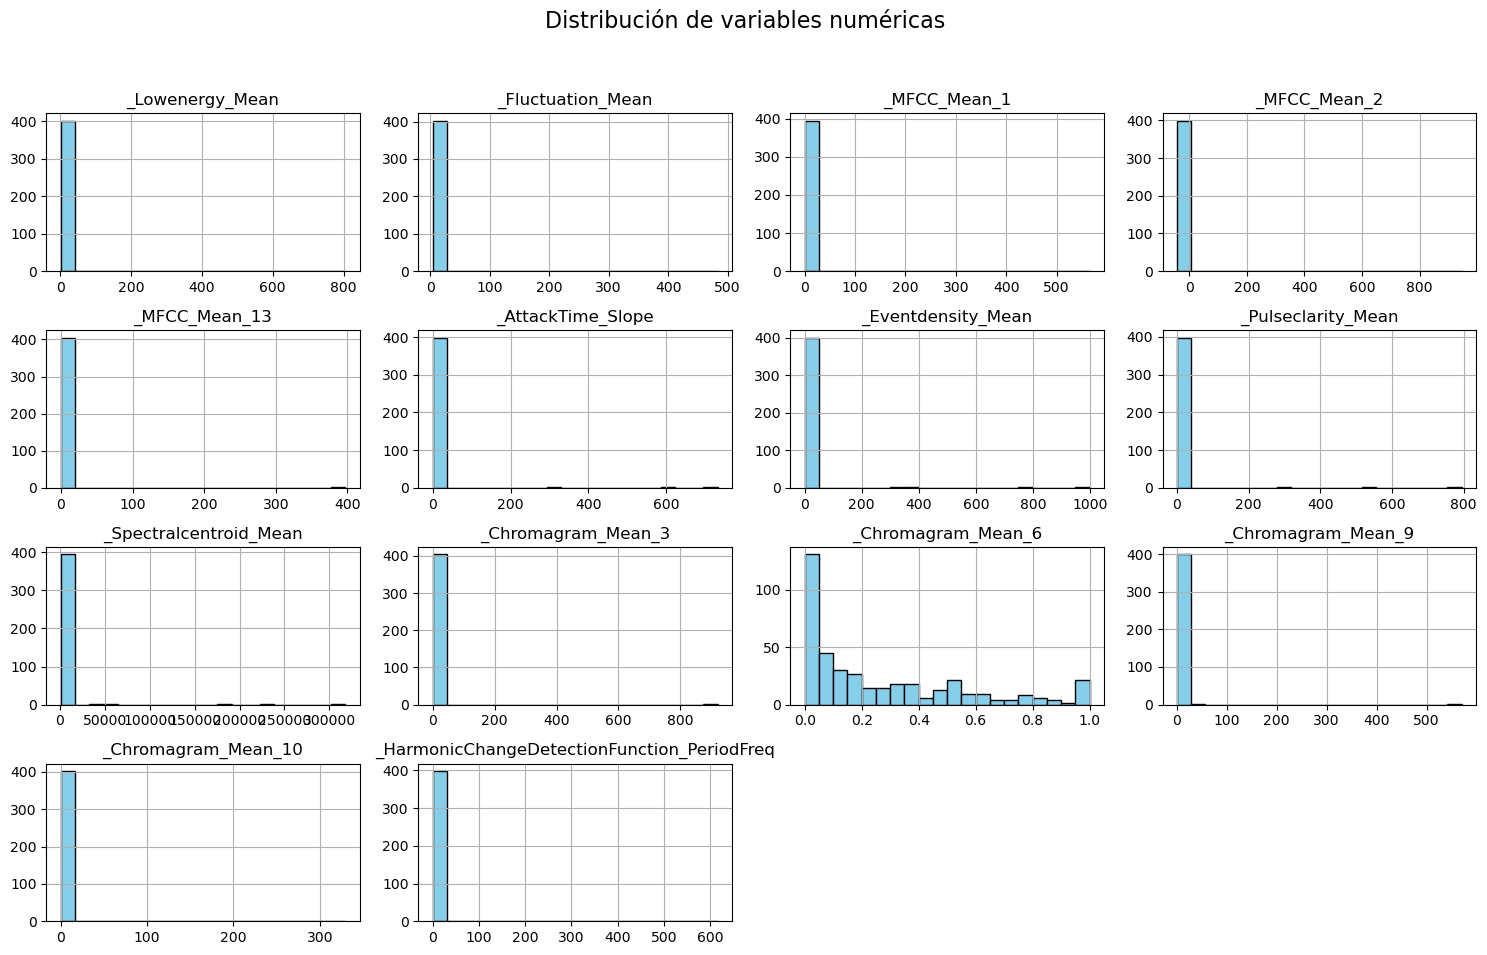


Dispersión y posibles outliers (Boxplots)


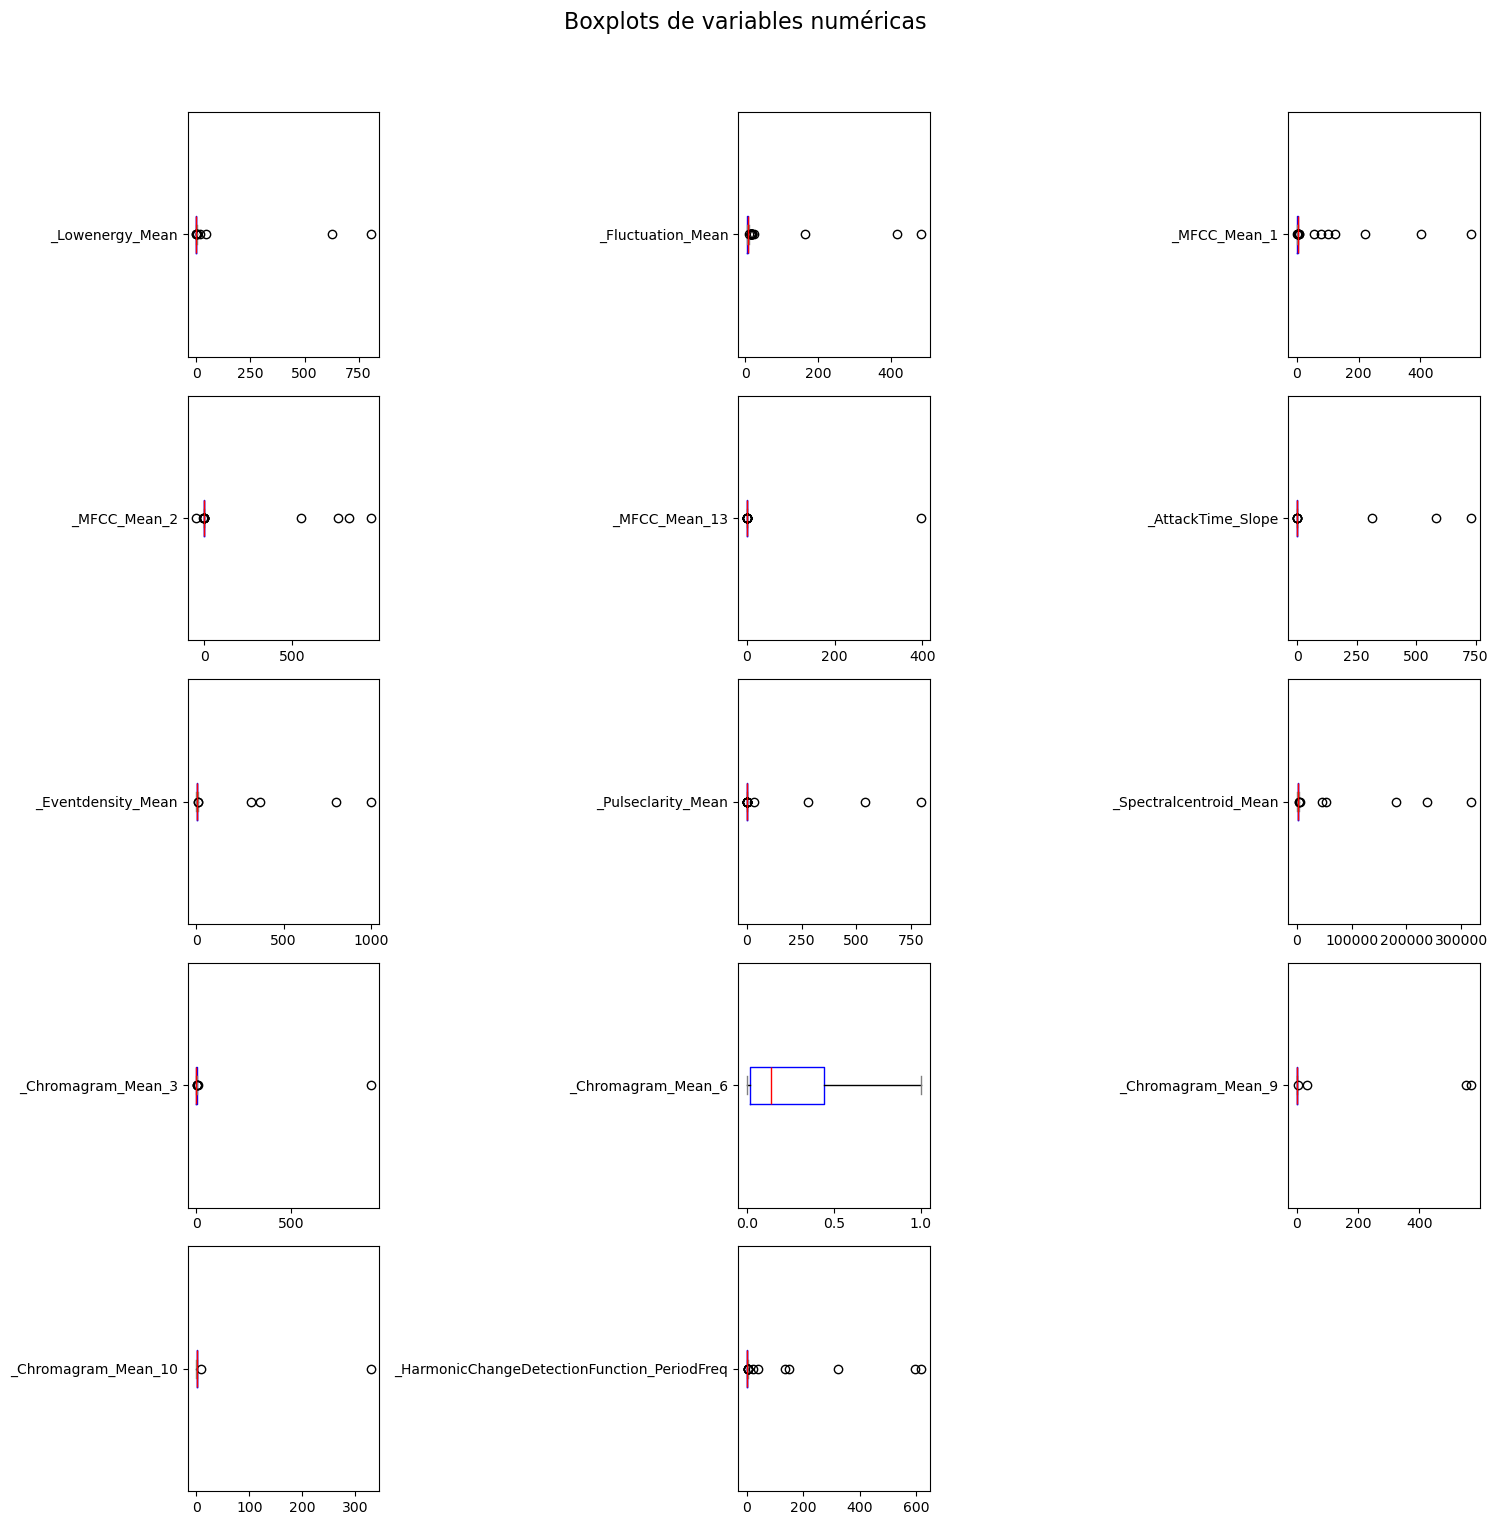

In [14]:
# Gráficas
plot_numeric_eda(df)

- Los histogramas anteriores sugieren que existen varios valores atípicos en diferentes columnas.

### Análisis de variables categóricas

In [17]:
# Descripción estadística
df.describe(include='O').T

,count,unique,top,freq
Class,403,8,relax,100
_RMSenergy_Mean,401,211,0.06,6
_Tempo_Mean,401,384,150.255,3
_MFCC_Mean_3,397,320,0.259,5
_MFCC_Mean_4,402,328,0.123,5
_MFCC_Mean_5,400,301,0.124,4
_MFCC_Mean_6,404,305,0.138,5
_MFCC_Mean_7,405,310,0.073,5
_MFCC_Mean_8,405,285,0.037,6
_MFCC_Mean_9,405,286,-0.018,5


- No sólo el nombre de las columnas sino adicionalmente la moda de la tabla anterior sugiere que son realmente valores numéricos. mixed_type_col y Class son las únicas que sugieren ser tipo string. A continuación revisamos el detalle:

In [19]:
# Recuentos únicos (número de ocurrencias para cada valor único)
cat_cols = ["Class", "mixed_type_col"]

for col in cat_cols:
    print(df[col].value_counts(dropna=False))
    print("\n")

Class
relax      100
sad         99
happy       98
angry       93
NaN          5
 HAPPY       4
 ANGRY       4
 SAD         3
 RELAX       2
Name: count, dtype: int64


mixed_type_col
bad        42
unknown    39
NaN        38
987         3
979         2
           ..
376         1
206         1
373         1
448         1
136         1
Name: count, Length: 258, dtype: int64




In [20]:
def plot_counts(df: pd.DataFrame, col: str, ascending: bool = False, horizontal: bool = False) -> None:
    """
    Grafica el conteo de valores únicos en una columna categórica.
    
    Parámetros:
        df (pd.DataFrame): DataFrame de entrada.
        col (str): Nombre de la columna a graficar.
        ascending (bool): Si True, ordena por frecuencia ascendente.
        horizontal (bool): Si True, muestra el gráfico de barras horizontal.
    """
    # Contar valores
    counts = df[col].value_counts(ascending=ascending, dropna=False)

    # Crear figura
    fig, ax = plt.subplots(figsize=(8, 5))
    
    if horizontal:
        counts.plot(kind="barh", color="skyblue", edgecolor="black", ax=ax)
        ax.set_xlabel("Conteo")
        ax.set_ylabel(col)
        ax.set_title(f"Distribución de {col}")
        for i, (value, count) in enumerate(counts.items()):
            ax.text(count + 0.5, i, str(count), va="center", fontsize=10)
    else:
        counts.plot(kind="bar", color="skyblue", edgecolor="black", ax=ax)
        ax.set_ylabel("Conteo")
        ax.set_xlabel(col)
        ax.set_title(f"Distribución de {col}")
        for i, count in enumerate(counts):
            ax.text(i, count + 0.5, str(count), ha="center", va="bottom", fontsize=10)
    
    plt.tight_layout()
    plt.show()

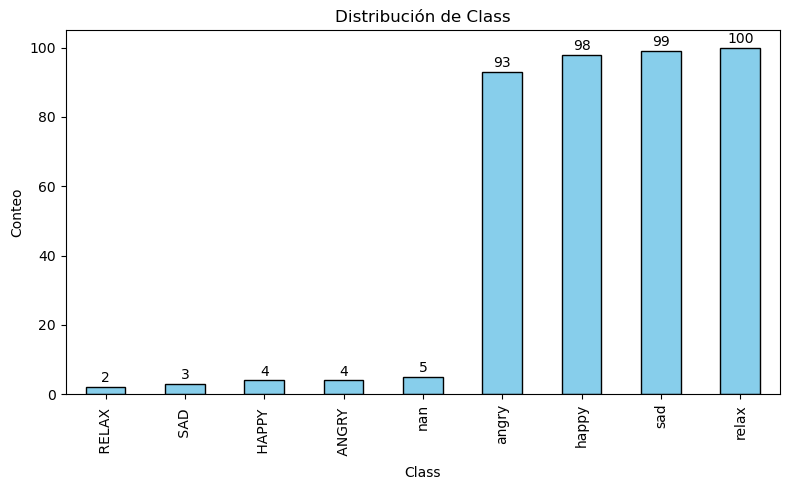

In [21]:
plot_counts(df, "Class", ascending=True)

* "mixed_type_col" también parece ser un numérica, sólo que se requiere cambiar "bad" y "unknown" por nulos inicialmente.
* La columna "Class" sólo requiere remover espacios al inicio y final de cada cadena y luego estandarizar así:
    * relax = RELAX
    * sad = SAD
    * happy = HAPPY
    * angry = ANGRY
* La columna "Class" y "mixed_type_col" también tiene valores faltantes.
* De esa manera la única categórica sería nuestra variable a predecir "Class". Por lo tanto creamos una función para convertirlas a numéricas las que faltan:

In [23]:
def clean_object_columns_to_numeric(
    df: pd.DataFrame,
    target_col: str = "Class"
) -> tuple[pd.DataFrame, dict]:
    """
    Limpia columnas tipo object en un DataFrame:
    - Quita espacios al inicio y final.
    - Elimina espacios internos.
    - Reemplaza comas por puntos (ej: "0,56" -> "0.56").
    - Convierte a numérico con errors='coerce' (valores no numéricos -> NaN).
    - Excluye la columna objetivo (por defecto 'Class').
    - Genera un reporte con los valores no convertibles por columna.

    Retorna:
        df_clean: DataFrame limpio.
        non_numeric_report: dict {columna: [valores no convertibles]}
    """
    df_clean = df.copy()
    non_numeric_report = {}

    for col in df_clean.select_dtypes(include="object").columns:
        if col == target_col:
            continue  # excluir la variable objetivo

        # Guardar versión original para comparación
        original_values = df_clean[col].copy()

        # Limpieza general
        df_clean[col] = (
            df_clean[col]
            .astype(str)
            .str.strip()           # eliminar espacios extremos
            .str.replace(" ", "", regex=False)  # eliminar espacios internos
            .str.replace(",", ".", regex=False)  # cambiar coma por punto
        )

        # Convertir a número
        df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

        # Redondear a 3 cifras
        df_clean[col] = df_clean[col].round(3)

        # Detectar valores que se volvieron NaN
        mask_nan = df_clean[col].isna()
        invalid_values = original_values[mask_nan].dropna().unique()

        if len(invalid_values) > 0:
            non_numeric_report[col] = invalid_values.tolist()

    return df_clean, non_numeric_report

In [24]:
df_clean, report = clean_object_columns_to_numeric(df, target_col="Class")

In [25]:
print("\n Reporte de valores no convertibles:\n")
for col, vals in report.items():
    print(f" - {col}: {vals}")


 Reporte de valores no convertibles:

 - _RMSenergy_Mean: ['error']
 - _Tempo_Mean: ['error', 'invalid']
 - _MFCC_Mean_3: ['?']
 - _MFCC_Mean_4: ['invalid', 'error']
 - _MFCC_Mean_5: ['invalid']
 - _MFCC_Mean_6: ['?']
 - _MFCC_Mean_7: ['error']
 - _MFCC_Mean_8: ['invalid']
 - _MFCC_Mean_9: ['?']
 - _MFCC_Mean_10: ['error']
 - _MFCC_Mean_11: [' NAN ']
 - _MFCC_Mean_12: ['?', 'error']
 - _Roughness_Mean: ['invalid']
 - _Roughness_Slope: ['error']
 - _Zero-crossingrate_Mean: ['error']
 - _AttackTime_Mean: ['?']
 - _Rolloff_Mean: [' ERROR ', ' NAN ', ' INVALID ']
 - _Brightness_Mean: ['invalid', '?']
 - _Spectralspread_Mean: ['error']
 - _Spectralskewness_Mean: ['error', 'invalid', '?']
 - _Spectralkurtosis_Mean: ['invalid', 'error']
 - _Spectralflatness_Mean: ['invalid', 'error']
 - _EntropyofSpectrum_Mean: ['invalid', '?']
 - _Chromagram_Mean_1: ['invalid', ' NAN ']
 - _Chromagram_Mean_2: ['error']
 - _Chromagram_Mean_4: ['?']
 - _Chromagram_Mean_5: ['error', '?']
 - _Chromagram_Mean_7:

- Teniendo en cuenta los resultados anteriores sobre la columna objetivo, es evidente que se tienen solamente 4 clases, por lo que procedemos a realizar una función para procesar la variable objetivo:

In [27]:
def normalize_target_column(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Normaliza la columna de clases:
    - Convierte a string
    - Strip: elimina espacios al inicio y al final
    - Convierte a minúsculas
    - Reemplaza valores no válidos por NaN
    """
    df_clean = df.copy()
    
    df_clean[col] = (
        df_clean[col]
        .astype(str)             # asegurar string
        .str.strip()             # quitar espacios extremos
        .str.lower()             # pasar a minúsculas
    )
    
    # Reemplazar valores "nan" de texto (que aparecen al convertir) por np.nan
    df_clean[col] = df_clean[col].replace("nan", pd.NA)
    
    # Mantener solo las clases válidas
    valid_classes = {"happy", "sad", "angry", "relax"}
    df_clean.loc[~df_clean[col].isin(valid_classes), col] = pd.NA
    
    return df_clean

In [28]:
df_clean = normalize_target_column(df_clean, "Class")

In [29]:
df_clean["Class"].value_counts(dropna=False)

Class
relax    102
happy    102
sad      102
angry     97
<NA>       5
Name: count, dtype: int64

- Dado a que los faltantes en la variable objetivo son menos del 2%, se eliminarán pues no tiene sentido imputar esas etiquetas cuando son pocos faltantes.

In [31]:
df_clean = df_clean.dropna(subset=["Class"])

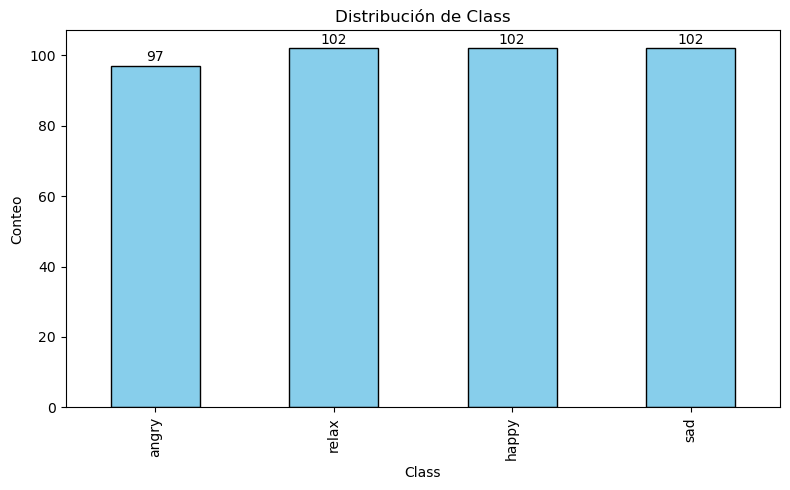

In [32]:
plot_counts(df_clean, "Class", ascending=True)

In [33]:
df_clean.describe(include='O').T

,count,unique,top,freq
Class,403,4,relax,102


- La clase más grande (relax, con 102) es casi idéntica a la más pequeña (angry, con 97). La diferencia es de solo 5 instancias, lo que representa una variación mínima en el conjunto de datos (aproximadamente un 1.2% del total de las 403 instancias). Se concluye que no se requiere balanceo de clases.

In [35]:
df_clean.isna().sum().mul(100).div(len(df_clean)).sort_values(ascending=False)

mixed_type_col                                    28.784119
_MFCC_Mean_3                                       2.977667
_MFCC_Mean_11                                      2.977667
_MFCC_Mean_12                                      2.729529
_RMSenergy_Mean                                    2.481390
_MFCC_Mean_5                                       2.233251
_Tempo_Mean                                        2.233251
_Spectralskewness_Mean                             2.233251
_HarmonicChangeDetectionFunction_Mean              2.233251
_MFCC_Mean_4                                       1.985112
_HarmonicChangeDetectionFunction_PeriodEntropy     1.985112
_Spectralcentroid_Mean                             1.985112
_HarmonicChangeDetectionFunction_Slope             1.985112
_MFCC_Mean_10                                      1.985112
_Spectralflatness_Mean                             1.736973
_Pulseclarity_Mean                                 1.736973
_Chromagram_Mean_1                      

- En la práctica de feature engineering, 25% se usa como umbral operativo para eliminar una columna con esa cantidad de faltantes.
- Necesario revisar importancia de la columna "mixed_type_col" antes de eliminarla, pues tiene casi el 30% de faltantes.
- Evaluar su correlación con el target (Class). Si no aporta información predictiva significativa, entonces se puede eliminar. NOTA: POR AHORA SE ELIMINA.

Algunas referencias:

- “When more than 20–30% of data in a variable are missing, imputation becomes unreliable, and analysts should consider excluding that variable unless the missingness mechanism is well understood.” (Little, R. J. A., & Rubin, D. B. (2002). Statistical Analysis with Missing Data. Wiley.)
- “High rates of missingness (above 40%) often yield unstable imputations, and dropping the variable may be preferable unless domain knowledge dictates otherwise.” (Van Buuren, S. (2018). Flexible Imputation of Missing Data. CRC Press.)
- “Variables with more than 25% missing values are often removed unless they have strong theoretical justification.” (Kuhn, M., & Johnson, K. (2013). Applied Predictive Modeling. Springer.)

In [37]:
df_clean = df_clean.drop(columns=["mixed_type_col"])

In [38]:
n_duplicates = df_clean.duplicated().sum()

if n_duplicates > 0:
    print(f"Se encontraron {n_duplicates} filas duplicadas. Serán eliminadas.")
    df_clean = df_clean.drop_duplicates()
    print(f"Después de eliminar, el DataFrame tiene {len(df_clean)} filas.")
else:
    print("No se encontraron filas duplicadas.")

Se encontraron 2 filas duplicadas. Serán eliminadas.
Después de eliminar, el DataFrame tiene 401 filas.


In [39]:
df_clean.describe(include='O').T

,count,unique,top,freq
Class,401,4,relax,102


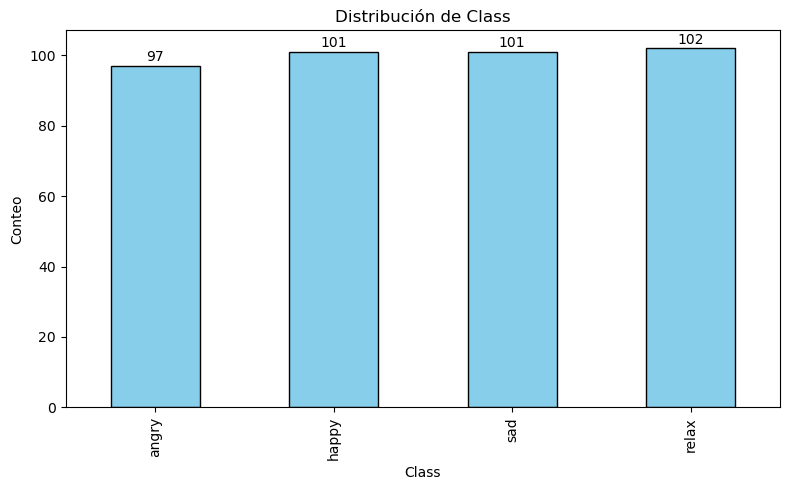

In [40]:
plot_counts(df_clean, "Class", ascending=True)

In [41]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
_RMSenergy_Mean,391.0,3.384156,48.244815,0.010,0.08500,0.1290,0.17650,873.096
_Lowenergy_Mean,397.0,4.306869,51.157993,0.302,0.52300,0.5540,0.58500,805.528
_Fluctuation_Mean,398.0,9.781450,32.482600,3.987,5.86775,6.7540,7.84175,483.105
_Tempo_Mean,392.0,153.870395,609.792194,48.284,101.49025,119.1165,147.73575,12177.714
_MFCC_Mean_1,396.0,6.330854,37.398159,0.423,1.95725,2.4230,2.90425,565.490
_MFCC_Mean_2,396.0,7.731732,78.487233,-43.608,-0.26950,0.0595,0.42000,946.483
_MFCC_Mean_3,389.0,9.184010,75.694587,-0.870,0.28500,0.4820,0.69100,721.726
_MFCC_Mean_4,393.0,2.548300,50.194637,-11.560,-0.12100,0.0490,0.20100,994.982
_MFCC_Mean_5,392.0,5.780663,55.342239,-0.494,0.06275,0.1885,0.30000,683.085
_MFCC_Mean_6,396.0,0.037124,0.206901,-0.916,-0.07825,0.0495,0.15350,0.799


- Varias variables (como _Chromagram_Mean_X, _Spectralkurtosis_Mean) muestran skewness > 1, donde la media no representa bien la centralidad, por lo que se decide aplicar la mediana como valor de imputación para valores nulos. Además de que la mediana no se ve afectada por valores extremos.

In [43]:
def replace_outliers_iqr(df: pd.DataFrame, factor: float = 1.5) -> pd.DataFrame:
    """
    Detecta outliers en columnas numéricas usando el método IQR
    y los reemplaza por NaN.

    Parámetros:
        df (pd.DataFrame): DataFrame de entrada.
        factor (float): multiplicador del IQR (1.5 por defecto, 3.0 si quieres ser más tolerante).

    Retorna:
        DataFrame con outliers reemplazados por NaN.
    """
    df_out = df.copy()
    numeric_cols = df_out.select_dtypes(include=["number"]).columns.tolist()

    print("Cantidad de outliers reemplazados por NaN:\n")
    
    for col in numeric_cols:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        # Identificar y reemplazar outliers
        mask_outliers = (df_out[col] < lower_bound) | (df_out[col] > upper_bound)
        n_outliers = mask_outliers.sum()

        if n_outliers > 0:
            print(f"- '{col}': {n_outliers}")
            df_out.loc[mask_outliers, col] = np.nan

    return df_out

In [44]:
df_no_outliers = replace_outliers_iqr(df_clean)

Cantidad de outliers reemplazados por NaN:

- '_RMSenergy_Mean': 6
- '_Lowenergy_Mean': 8
- '_Fluctuation_Mean': 16
- '_Tempo_Mean': 1
- '_MFCC_Mean_1': 21
- '_MFCC_Mean_2': 12
- '_MFCC_Mean_3': 11
- '_MFCC_Mean_4': 14
- '_MFCC_Mean_5': 12
- '_MFCC_Mean_6': 16
- '_MFCC_Mean_7': 12
- '_MFCC_Mean_8': 13
- '_MFCC_Mean_9': 13
- '_MFCC_Mean_10': 12
- '_MFCC_Mean_11': 15
- '_MFCC_Mean_12': 12
- '_MFCC_Mean_13': 15
- '_Roughness_Mean': 17
- '_Roughness_Slope': 14
- '_Zero-crossingrate_Mean': 7
- '_AttackTime_Mean': 40
- '_AttackTime_Slope': 8
- '_Rolloff_Mean': 2
- '_Eventdensity_Mean': 6
- '_Pulseclarity_Mean': 15
- '_Brightness_Mean': 6
- '_Spectralcentroid_Mean': 8
- '_Spectralspread_Mean': 1
- '_Spectralskewness_Mean': 20
- '_Spectralkurtosis_Mean': 38
- '_Spectralflatness_Mean': 12
- '_EntropyofSpectrum_Mean': 19
- '_Chromagram_Mean_1': 3
- '_Chromagram_Mean_2': 19
- '_Chromagram_Mean_3': 5
- '_Chromagram_Mean_4': 23
- '_Chromagram_Mean_5': 12
- '_Chromagram_Mean_7': 21
- '_Chromagram_Me

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer

# Separación de X e Y
Y = df_no_outliers["Class"].copy()
X = df_no_outliers.drop(columns=["Class"]).copy()

# Separación de columnas en X
num_cols = X.select_dtypes(include=["number"]).columns 

# Pipeline para imputar con la mediana
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

# Combinación final
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, num_cols)
    ],
    remainder='passthrough'
)

# Aplicación del pipeline
X_preprocessed = preprocessor.fit_transform(X)

# Obtener los nombres de las features de la salida del ColumnTransformer
feature_names = preprocessor.get_feature_names_out()

# Reconstruir dataframe con nombres de columnas
X_preprocessed = pd.DataFrame(X_preprocessed, columns=feature_names)

# Renombrar las columnas de X para limpiarlas
X_preprocessed.columns = [col.split('__')[1] for col in X_preprocessed.columns]

# Unir X procesada con Y original
df_preprocessed = pd.concat([X_preprocessed, Y.reset_index(drop=True)], axis=1)

df_preprocessed

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy,Class
0,0.052,0.553,9.136,130.043,3.997,0.363,0.887,0.078,0.221,0.1180,...,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970,relax
1,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,0.0505,...,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967,relax
2,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,0.1400,...,0.746,0.016,1.000,0.413,0.190,0.134,1.682,0.692,0.963,relax
3,0.135,0.603,10.442,65.991,2.841,0.059,0.612,0.351,0.011,0.1430,...,1.000,0.161,0.757,0.334,0.265,0.042,0.354,0.743,0.968,relax
4,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,0.2850,...,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.967,relax
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,0.268,0.496,4.444,150.255,2.314,0.118,0.541,-0.185,0.063,0.1640,...,0.770,0.888,0.192,0.402,0.182,-0.057,0.673,0.834,0.965,angry
397,0.070,0.565,8.010,122.246,2.146,0.758,0.599,-0.084,0.044,0.1550,...,0.073,0.037,0.593,0.410,0.263,0.013,1.922,0.719,0.973,sad
398,0.158,0.531,9.462,108.272,2.166,-0.336,0.820,-0.279,0.194,-0.1510,...,0.598,1.000,0.603,0.372,0.189,0.000,0.897,0.804,0.969,happy
399,0.128,0.660,6.354,77.051,2.537,-0.063,0.604,0.240,0.367,0.0340,...,0.305,0.109,0.014,0.389,0.243,0.063,2.243,0.754,0.965,relax


En resúmen lo que se ha realizado hasta aquí:
- Convertir variables tipo objeto en numéricas, las que no se pueden convertir se les asigna NaN.
- Limpieza de la variable objetivo "Class", esto es definir sólo 4 clases en total y eliminar los valores nulos.
- Eliminar columnas con tantos vacios que no aportan al modelo según referencias bibliográficas, como la columna "mixed_type_col".
- Eliminar duplicados.
- Detecta outliers en todas las columnas numéricas usando el método IQR, los reemplaza por NaN e imputa usando la mediana.

Ahora si volvamos a revisar las distribuciones de cada una de las variables numéricas:

Distribución de variables numéricas (Histogramas)


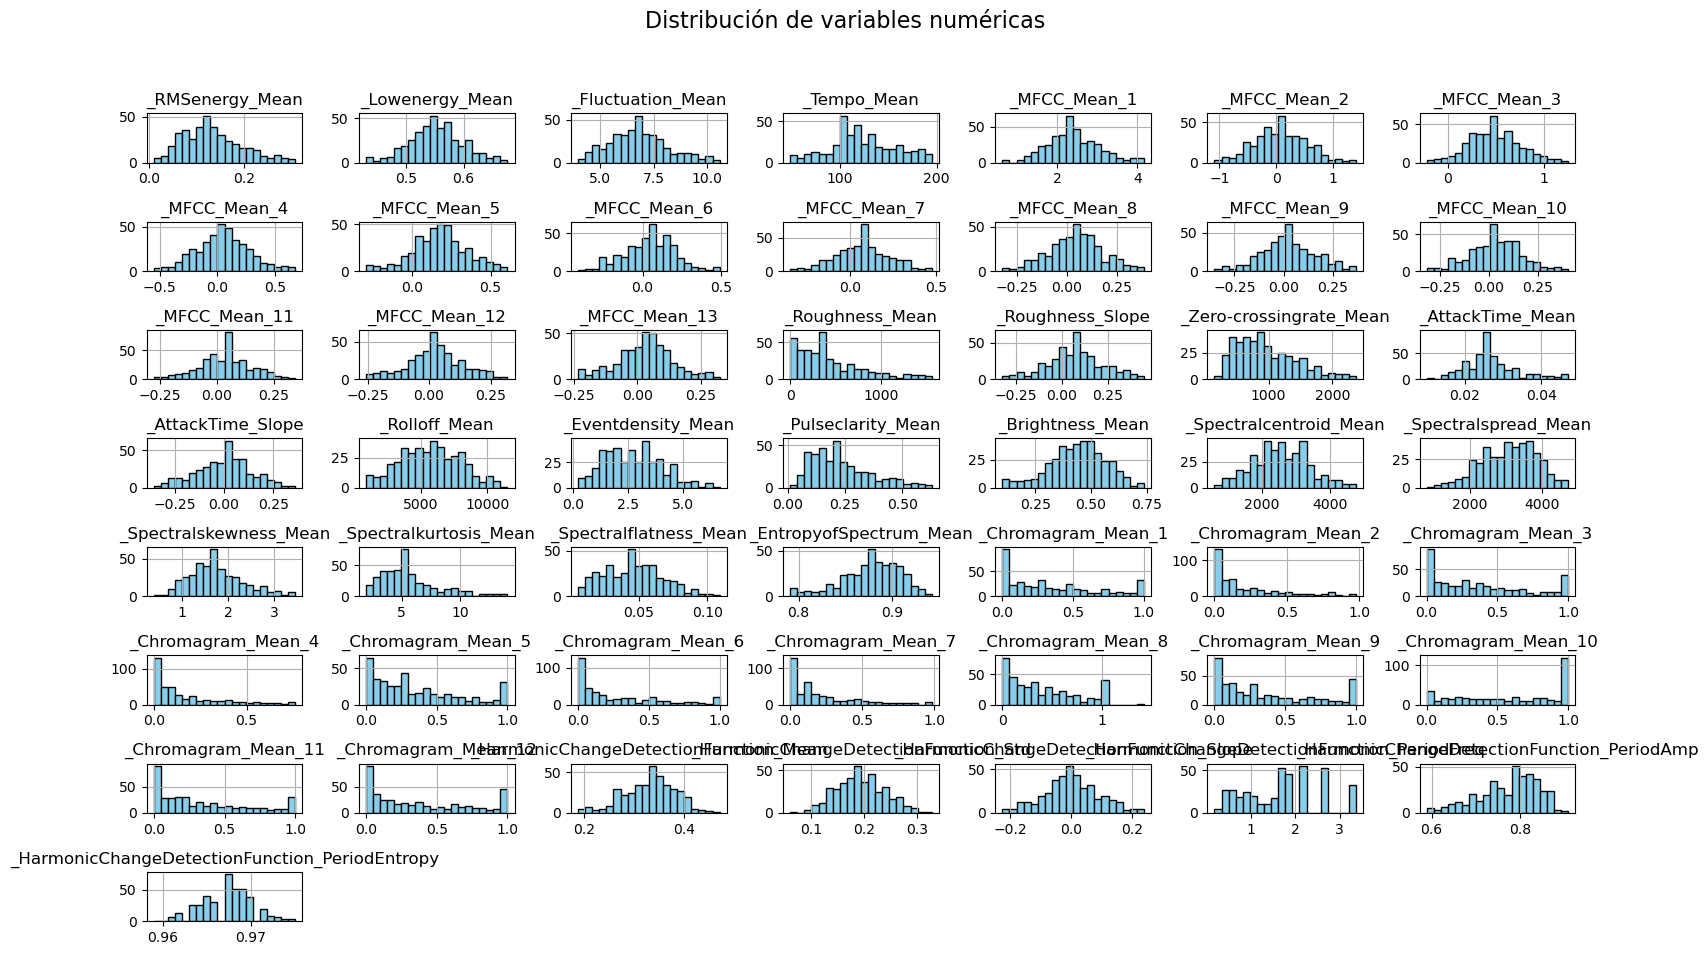


Dispersión y posibles outliers (Boxplots)


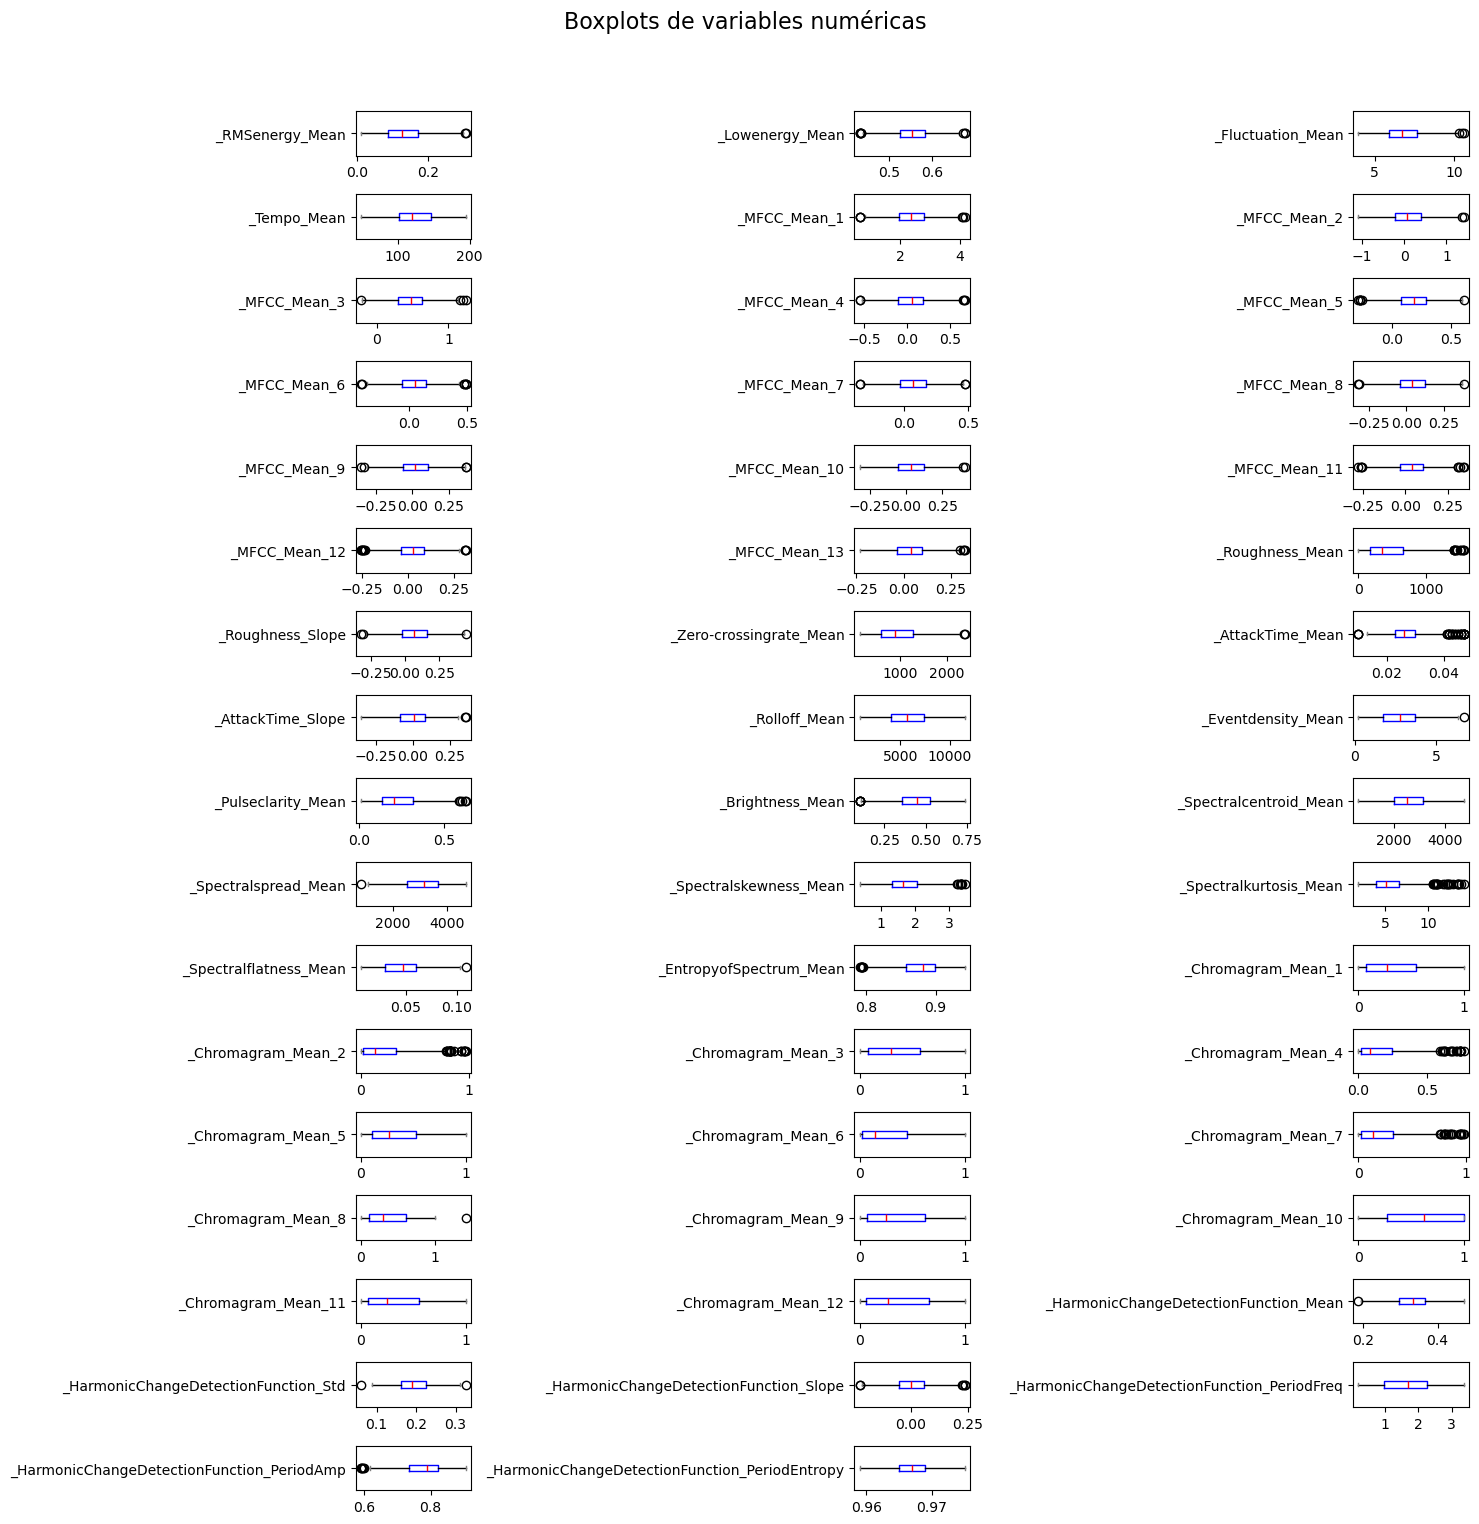

In [47]:
# Revisar de nuevo las distribuciones después de realizar la primera fase de la limpieza
plot_numeric_eda(df_preprocessed, bins=20)

In [48]:
df_preprocessed.describe().T

,count,mean,std,min,25%,50%,75%,max
_RMSenergy_Mean,401.0,0.134172,0.061792,0.010,0.086,0.1280,0.173,0.309
_Lowenergy_Mean,401.0,0.553958,0.046459,0.431,0.524,0.5530,0.582,0.676
_Fluctuation_Mean,401.0,6.829193,1.359698,3.987,5.879,6.7025,7.628,10.578
_Tempo_Mean,401.0,123.017259,33.525545,48.284,101.964,119.0440,146.344,195.026
_MFCC_Mean_1,401.0,2.384970,0.639996,0.634,1.964,2.3440,2.797,4.165
_MFCC_Mean_2,401.0,0.070673,0.458975,-1.088,-0.227,0.0590,0.391,1.411
_MFCC_Mean_3,401.0,0.484963,0.267388,-0.218,0.303,0.4760,0.638,1.248
_MFCC_Mean_4,401.0,0.049227,0.226902,-0.550,-0.103,0.0580,0.191,0.675
_MFCC_Mean_5,401.0,0.179756,0.172551,-0.290,0.069,0.1820,0.282,0.607
_MFCC_Mean_6,401.0,0.042375,0.159895,-0.411,-0.062,0.0505,0.146,0.491


In [49]:
# Forma (asimetría)
df_preprocessed.skew(numeric_only=True).sort_values(ascending=False)

_Chromagram_Mean_7                                1.377947
_Chromagram_Mean_4                                1.359084
_Chromagram_Mean_2                                1.271794
_Spectralkurtosis_Mean                            1.189949
_Chromagram_Mean_6                                1.138362
_Roughness_Mean                                   1.114264
_Pulseclarity_Mean                                0.867636
_Chromagram_Mean_5                                0.835100
_Chromagram_Mean_11                               0.758442
_AttackTime_Mean                                  0.756392
_Chromagram_Mean_9                                0.754867
_Zero-crossingrate_Mean                           0.723043
_Chromagram_Mean_1                                0.706940
_Chromagram_Mean_3                                0.686777
_Spectralskewness_Mean                            0.637618
_Chromagram_Mean_8                                0.623404
_Chromagram_Mean_12                               0.5852

- Las 6 primeras presentan cola derecha larga, incluso después de eliminar outliers, lo que sugiere distribuciones sesgadas hacia valores bajos y pocos valores altos.
- Considerar transformaciones logarítmicas o Box–Cox teniendo en cuenta que tienen valores positivos. Esto estabiliza la varianza y reduce la asimetría.

In [51]:
# Forma (curtosis)
df_preprocessed.kurt(numeric_only=True).sort_values(ascending=False)

_Chromagram_Mean_7                                1.288331
_Spectralkurtosis_Mean                            1.177413
_Chromagram_Mean_4                                0.986605
_AttackTime_Mean                                  0.836469
_Chromagram_Mean_2                                0.701187
_Roughness_Mean                                   0.574818
_Chromagram_Mean_6                                0.262137
_Spectralskewness_Mean                            0.223152
_MFCC_Mean_1                                      0.159425
_MFCC_Mean_10                                     0.156374
_Pulseclarity_Mean                                0.135707
_EntropyofSpectrum_Mean                           0.132383
_MFCC_Mean_5                                      0.126451
_MFCC_Mean_6                                      0.123333
_MFCC_Mean_11                                     0.110323
_MFCC_Mean_4                                      0.088484
_MFCC_Mean_13                                     0.0774

- Casi todas las variables están entre -0.4 y +0.9, lo cual indica distribuciones relativamente planas o normales. Muy pocas con curtosis positiva significativa (_Chromagram_Mean_7 = 0.95, _Spectralkurtosis_Mean = 0.79).
- Esto confirma que la eliminación de outliers fue efectiva, ya que las colas extremas (que elevan la curtosis) se redujeron.

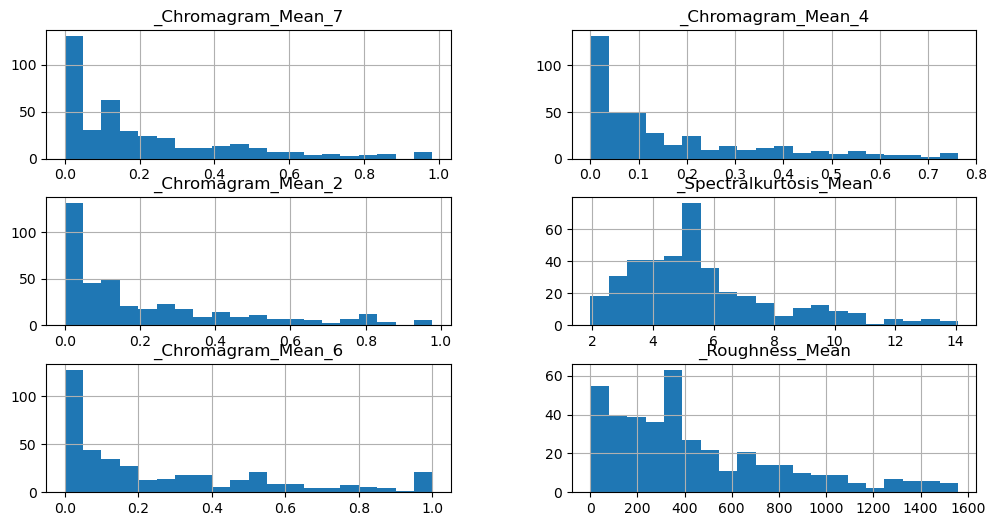

In [53]:
cols_skewed = df_preprocessed.skew(numeric_only=True).sort_values(ascending=False).head(6).index
df_preprocessed[cols_skewed].hist(figsize=(12,6), bins=20)
plt.show()

In [54]:
for i in cols_skewed:
    print(f"{i}: {df_preprocessed[df_preprocessed[i] == 0].shape[0]}")

_Chromagram_Mean_7: 46
_Chromagram_Mean_4: 51
_Chromagram_Mean_2: 54
_Spectralkurtosis_Mean: 0
_Chromagram_Mean_6: 47
_Roughness_Mean: 0


- Teniendo en cuenta la alta asimetría con muchos ceros (o valores pequeños positivos) para los características anteriores y que también existen características sin valores en 0. Se aplicará una transformación que se adapta automáticamente según la distribución, soporta ceros y negativos. Esto es PowerTransformer(method="yeo-johnson") de scikit-learn.

In [56]:
df_preprocessed.isna().sum().mul(100).div(len(df_preprocessed)).sort_values(ascending=False)

_RMSenergy_Mean                                   0.0
_Chromagram_Mean_7                                0.0
_Spectralskewness_Mean                            0.0
_Spectralkurtosis_Mean                            0.0
_Spectralflatness_Mean                            0.0
_EntropyofSpectrum_Mean                           0.0
_Chromagram_Mean_1                                0.0
_Chromagram_Mean_2                                0.0
_Chromagram_Mean_3                                0.0
_Chromagram_Mean_4                                0.0
_Chromagram_Mean_5                                0.0
_Chromagram_Mean_6                                0.0
_Chromagram_Mean_8                                0.0
_Spectralcentroid_Mean                            0.0
_Chromagram_Mean_9                                0.0
_Chromagram_Mean_10                               0.0
_Chromagram_Mean_11                               0.0
_Chromagram_Mean_12                               0.0
_HarmonicChangeDetectionFunc

In [57]:
n_duplicates = df_preprocessed.duplicated().sum()

if n_duplicates > 0:
    print(f"Se encontraron {n_duplicates} filas duplicadas. Serán eliminadas.")
    df_preprocessed = df_preprocessed.drop_duplicates()
    print(f"Después de eliminar, el DataFrame tiene {len(df_preprocessed)} filas.")
else:
    print("No se encontraron filas duplicadas.")

No se encontraron filas duplicadas.


### "Intento" de comparación con el conjunto de datos original -> Esto no lo piden.

In [59]:
df_original = pd.read_csv("../data/raw/turkis_music_emotion_original.csv")
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

In [60]:
# # Asegurar que columnas están en el mismo orden y tipos
# common_cols = df_original.columns.intersection(df_preprocessed.columns)
# df_orig_aligned = df_original[common_cols].copy()
# df_prep_aligned = df_preprocessed[common_cols].copy()

# # Convertir filas en tuplas para comparar fácilmente
# orig_set = set([tuple(row) for row in df_orig_aligned.itertuples(index=False)])
# prep_set = set([tuple(row) for row in df_prep_aligned.itertuples(index=False)])

# # Intersección (filas idénticas)
# common_rows = orig_set.intersection(prep_set)

# # Porcentaje de coincidencia
# pct_match = len(common_rows) / len(df_prep_aligned) * 100

# print(f"✅ Coincidencia exacta de filas: {pct_match:.2f}%")
# print(f" - Filas totales en df_preprocessed: {len(df_prep_aligned)}")
# print(f" - Filas encontradas en df_original: {len(common_rows)}")

In [61]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Solo columnas numéricas
num_cols = df_original.select_dtypes(include=["number"]).columns.intersection(df_preprocessed.columns)
A = df_original[num_cols].to_numpy()
B = df_preprocessed[num_cols].to_numpy()

# Redimensionar (por si tienen diferente número de filas)
min_rows = min(A.shape[0], B.shape[0])
A, B = A[:min_rows], B[:min_rows]

# Similitud coseno promedio fila a fila
similarities = [cosine_similarity(A[i].reshape(1, -1), B[i].reshape(1, -1))[0,0] for i in range(min_rows)]
avg_similarity = np.mean(similarities)

print(f"🔹 Similitud promedio (cosine): {avg_similarity:.3f}")

🔹 Similitud promedio (cosine): 0.992


- Esto indica que las distribuciones numéricas permanecieron casi idénticas a las originales, lo cual es una señal de que la imputación fue suave y coherente.

## **Parte 2**. Análisis de correlación (bivariante y multivariante)

In [64]:
# sns.clustermap(
#     df_preprocessed.drop(columns=["Class"]).corr(),
#     cmap="coolwarm",
#     figsize=(14, 12),
#     center=0
# )
# plt.suptitle("Cluster de correlaciones entre variables", y=1.02)
# plt.show()

In [65]:
# Calcular la matriz de correlación sin la columna 'Class'
corr_matrix = df_preprocessed.drop(columns=["Class"]).corr()

# Filtrar la mitad superior de la matriz (para no repetir pares)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_upper = corr_matrix.where(~mask)

# Convertir a formato largo (tidy)
high_corr_df = (
    corr_upper.stack()
    .reset_index()
    .rename(columns={'level_0': 'Variable_1', 'level_1': 'Variable_2', 0: 'Correlation'})
)

# Filtrar correlaciones absolutas mayores o iguales a 0.7
threshold = 0.7
high_corr_df = high_corr_df.loc[high_corr_df['Correlation'].abs() >= threshold]

# Ordenar por magnitud de correlación
high_corr_df = high_corr_df.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

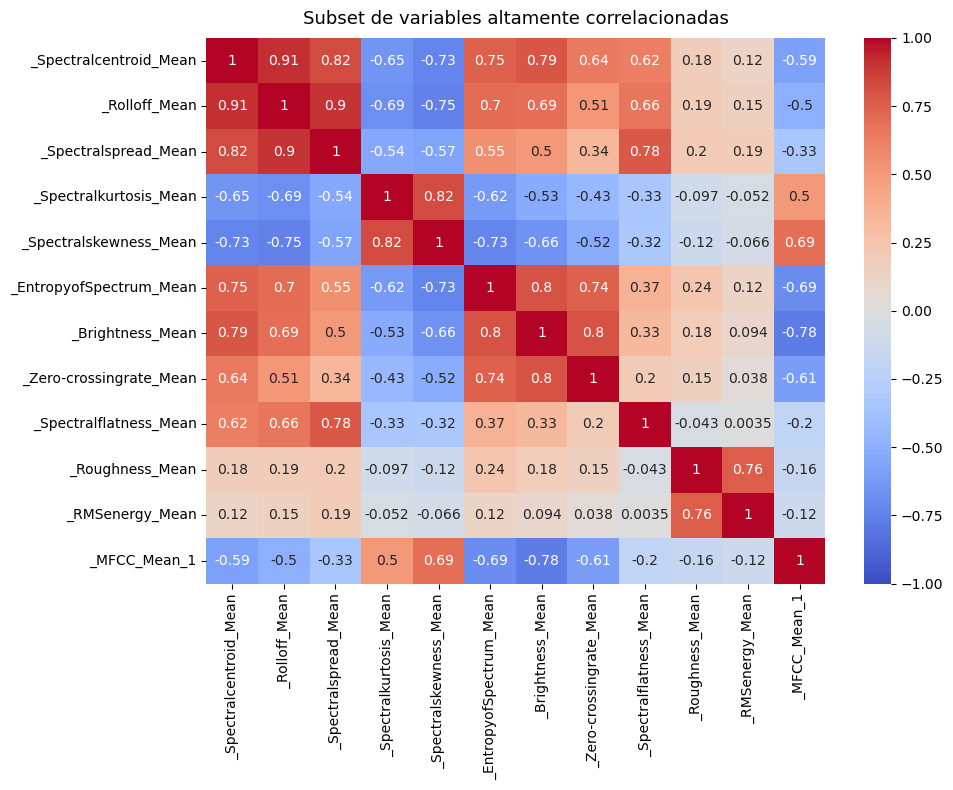

In [66]:
# Conjunto único de todas las variables implicadas
high_corr_vars = pd.unique(
    high_corr_df[['Variable_1', 'Variable_2']].values.ravel()
)

# Submatriz de correlación sólo con esas variables
subset_corr = df_preprocessed[high_corr_vars].corr()

# Gráfico
plt.figure(figsize=(10, 8))
sns.heatmap(
    subset_corr,
    annot=True,
    cmap="coolwarm",
    center=0,
    vmin=-1, vmax=1,
)
plt.title("Subset de variables altamente correlacionadas", fontsize=13, pad=10)
plt.tight_layout()
plt.show()

In [133]:
high_corr_df

,Variable_1,Variable_2,Correlation
0,_Spectralcentroid_Mean,_Rolloff_Mean,0.908811
1,_Spectralspread_Mean,_Rolloff_Mean,0.899940
2,_Spectralkurtosis_Mean,_Spectralskewness_Mean,0.824883
3,_Spectralspread_Mean,_Spectralcentroid_Mean,0.821041
4,_EntropyofSpectrum_Mean,_Brightness_Mean,0.803005
5,_Brightness_Mean,_Zero-crossingrate_Mean,0.798691
6,_Spectralcentroid_Mean,_Brightness_Mean,0.785227
7,_Spectralflatness_Mean,_Spectralspread_Mean,0.776683
8,_Roughness_Mean,_RMSenergy_Mean,0.758948
9,_EntropyofSpectrum_Mean,_Spectralcentroid_Mean,0.747484


- Hay varias variables midiendo la forma del espectro, por eso se correlacionan tanto.

In [69]:
def plot_boxplots_by_class(df, target_col="Class", n_cols=3, max_plots=9):
    """
    Genera boxplots de todas las columnas numéricas respecto a una variable categórica.
    Compatible con seaborn >= 0.13.2
    """
    # Selecciona columnas numéricas
    num_cols = df.select_dtypes(include=['number']).columns.tolist()
    n_rows = (max_plots + n_cols - 1) // n_cols

    for i in range(0, len(num_cols), max_plots):
        subset_cols = num_cols[i:i+max_plots]
        fig, axes = plt.subplots(
            nrows=n_rows,
            ncols=n_cols,
            figsize=(6*n_cols, 4*n_rows)
        )
        axes = axes.flatten()

        for ax, col in zip(axes, subset_cols):
            sns.boxplot(
                data=df,
                x=target_col,
                y=col,
                hue=target_col,        # Agregado para compatibilidad
                palette="Set2",
                legend=False,          # Evita mostrar leyenda redundante
                ax=ax
            )
            ax.set_title(col, fontsize=11)
            ax.set_xlabel("")
            ax.set_ylabel("")
            ax.tick_params(axis='x', rotation=30)
        
        # Oculta ejes vacíos
        for ax in axes[len(subset_cols):]:
            ax.set_visible(False)

        plt.tight_layout()
        plt.show()

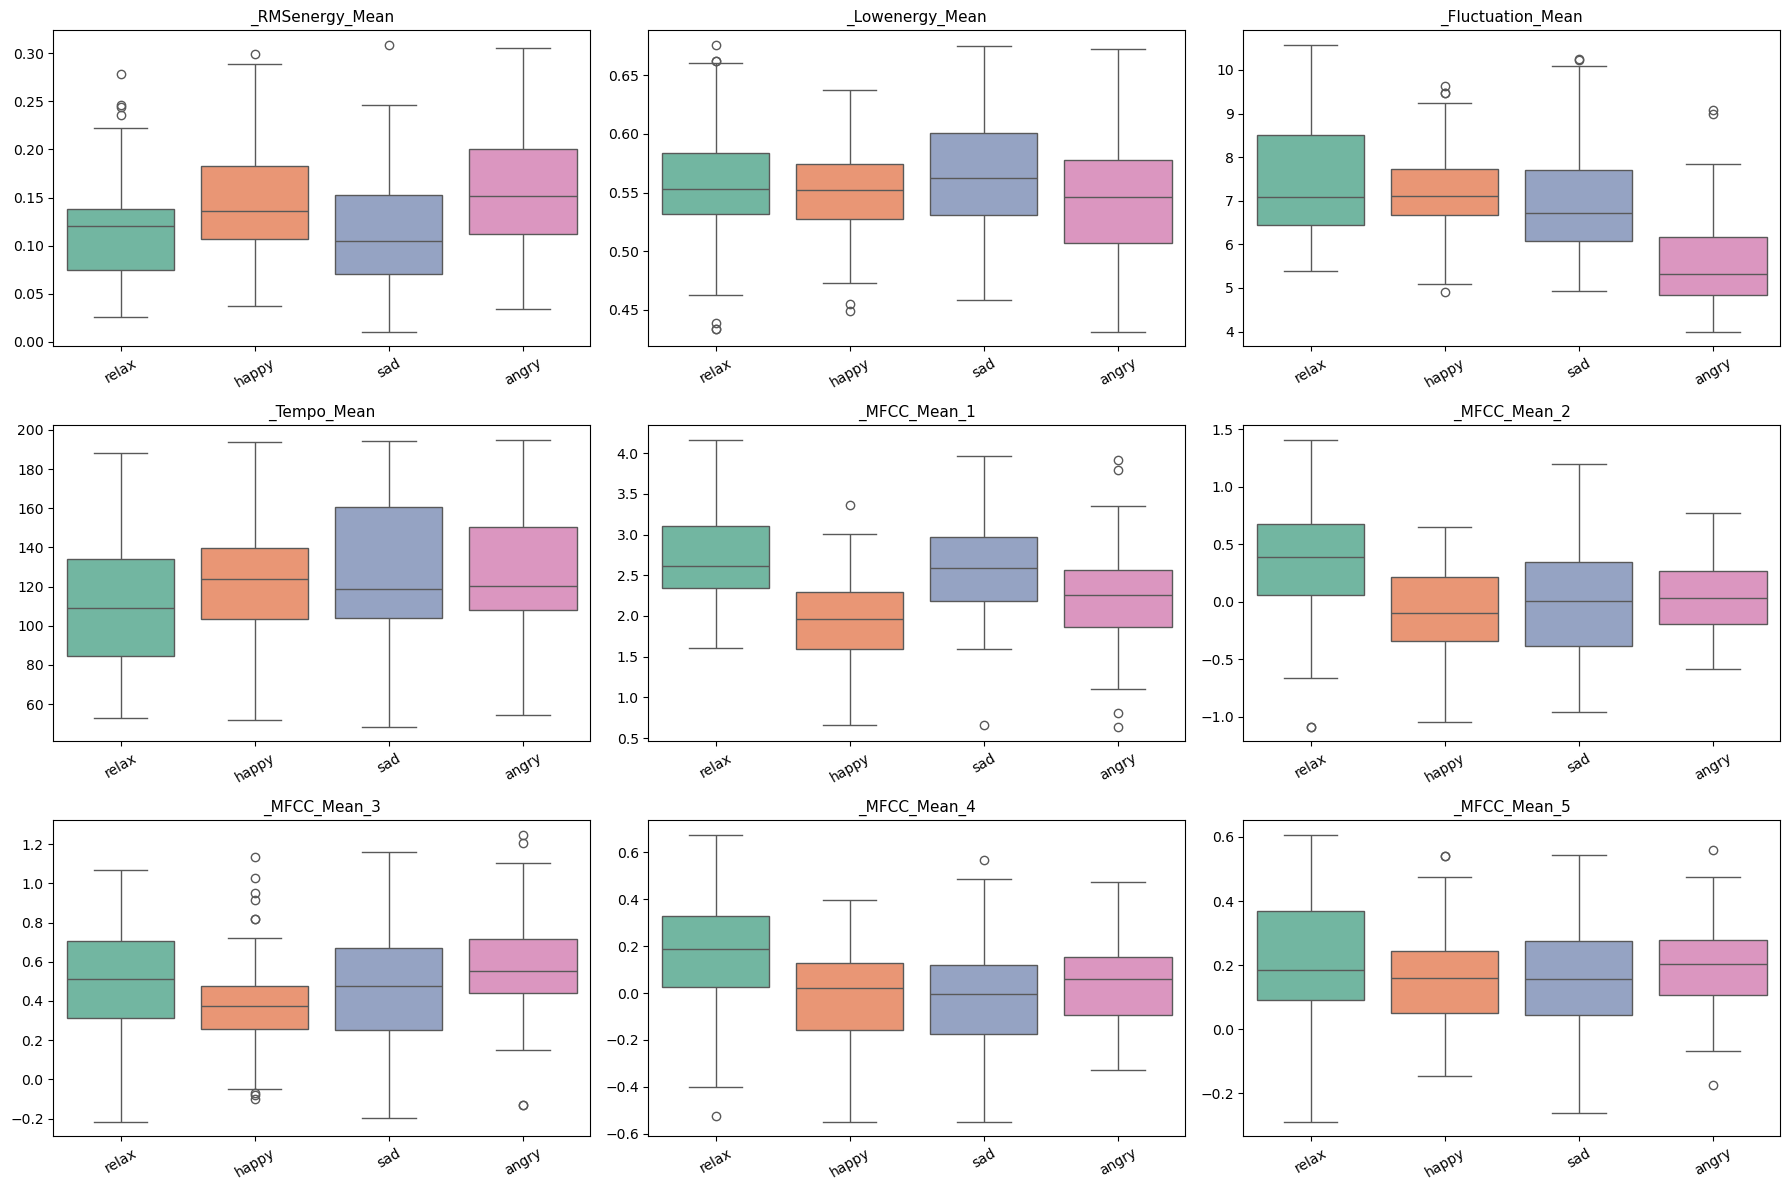

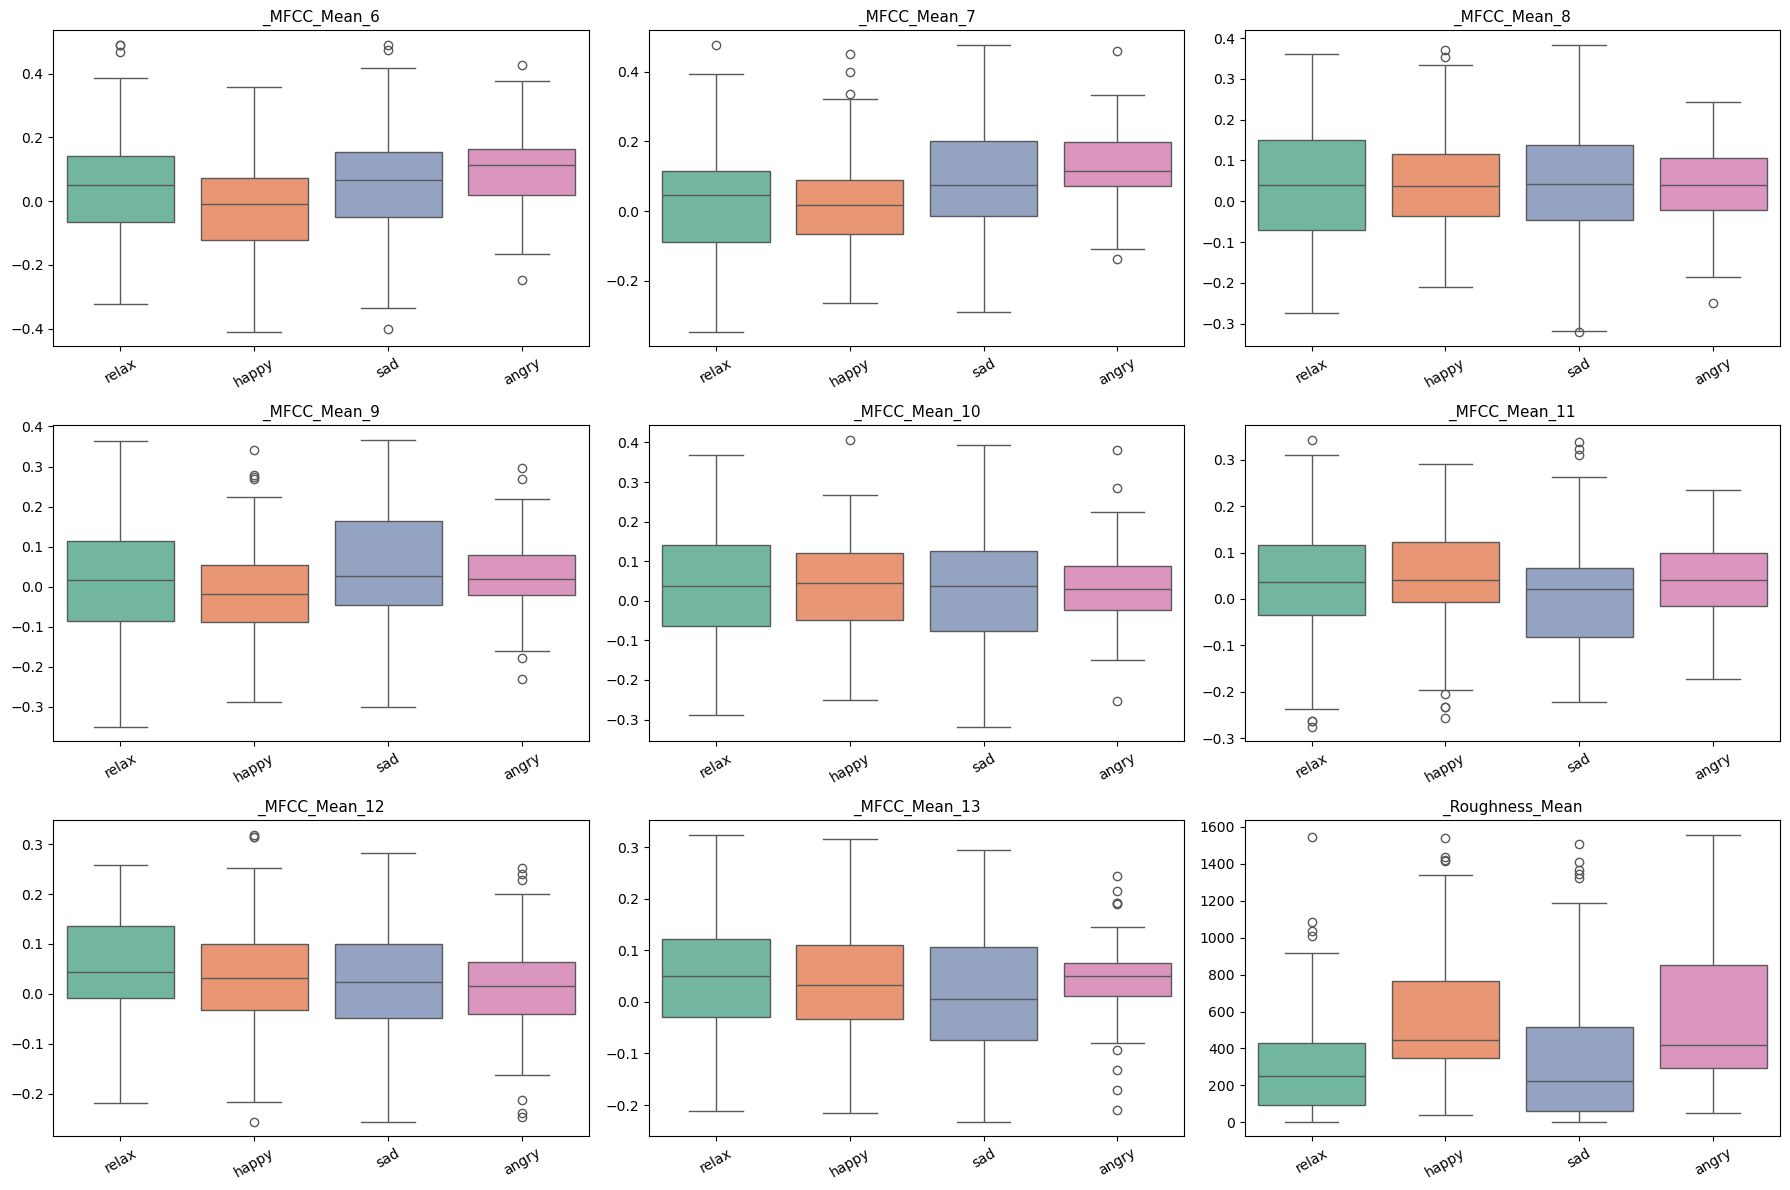

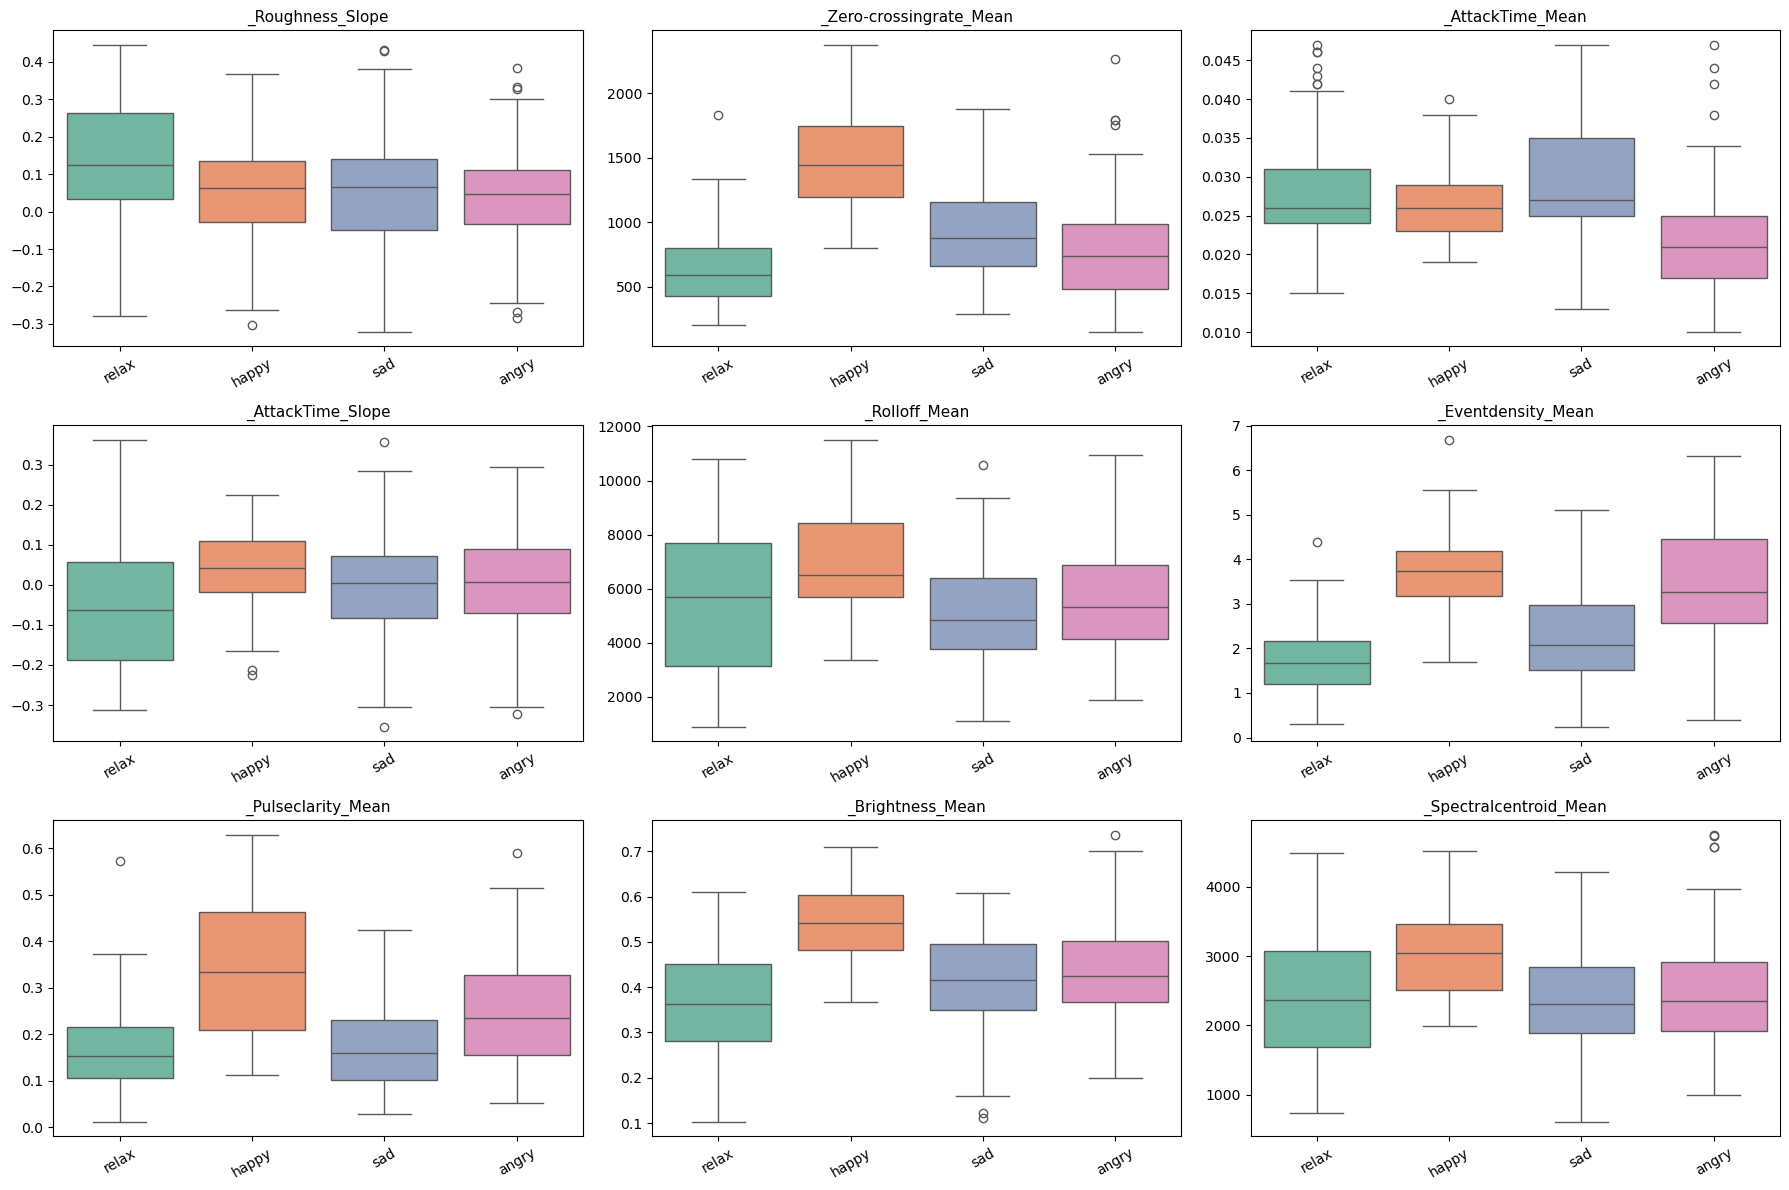

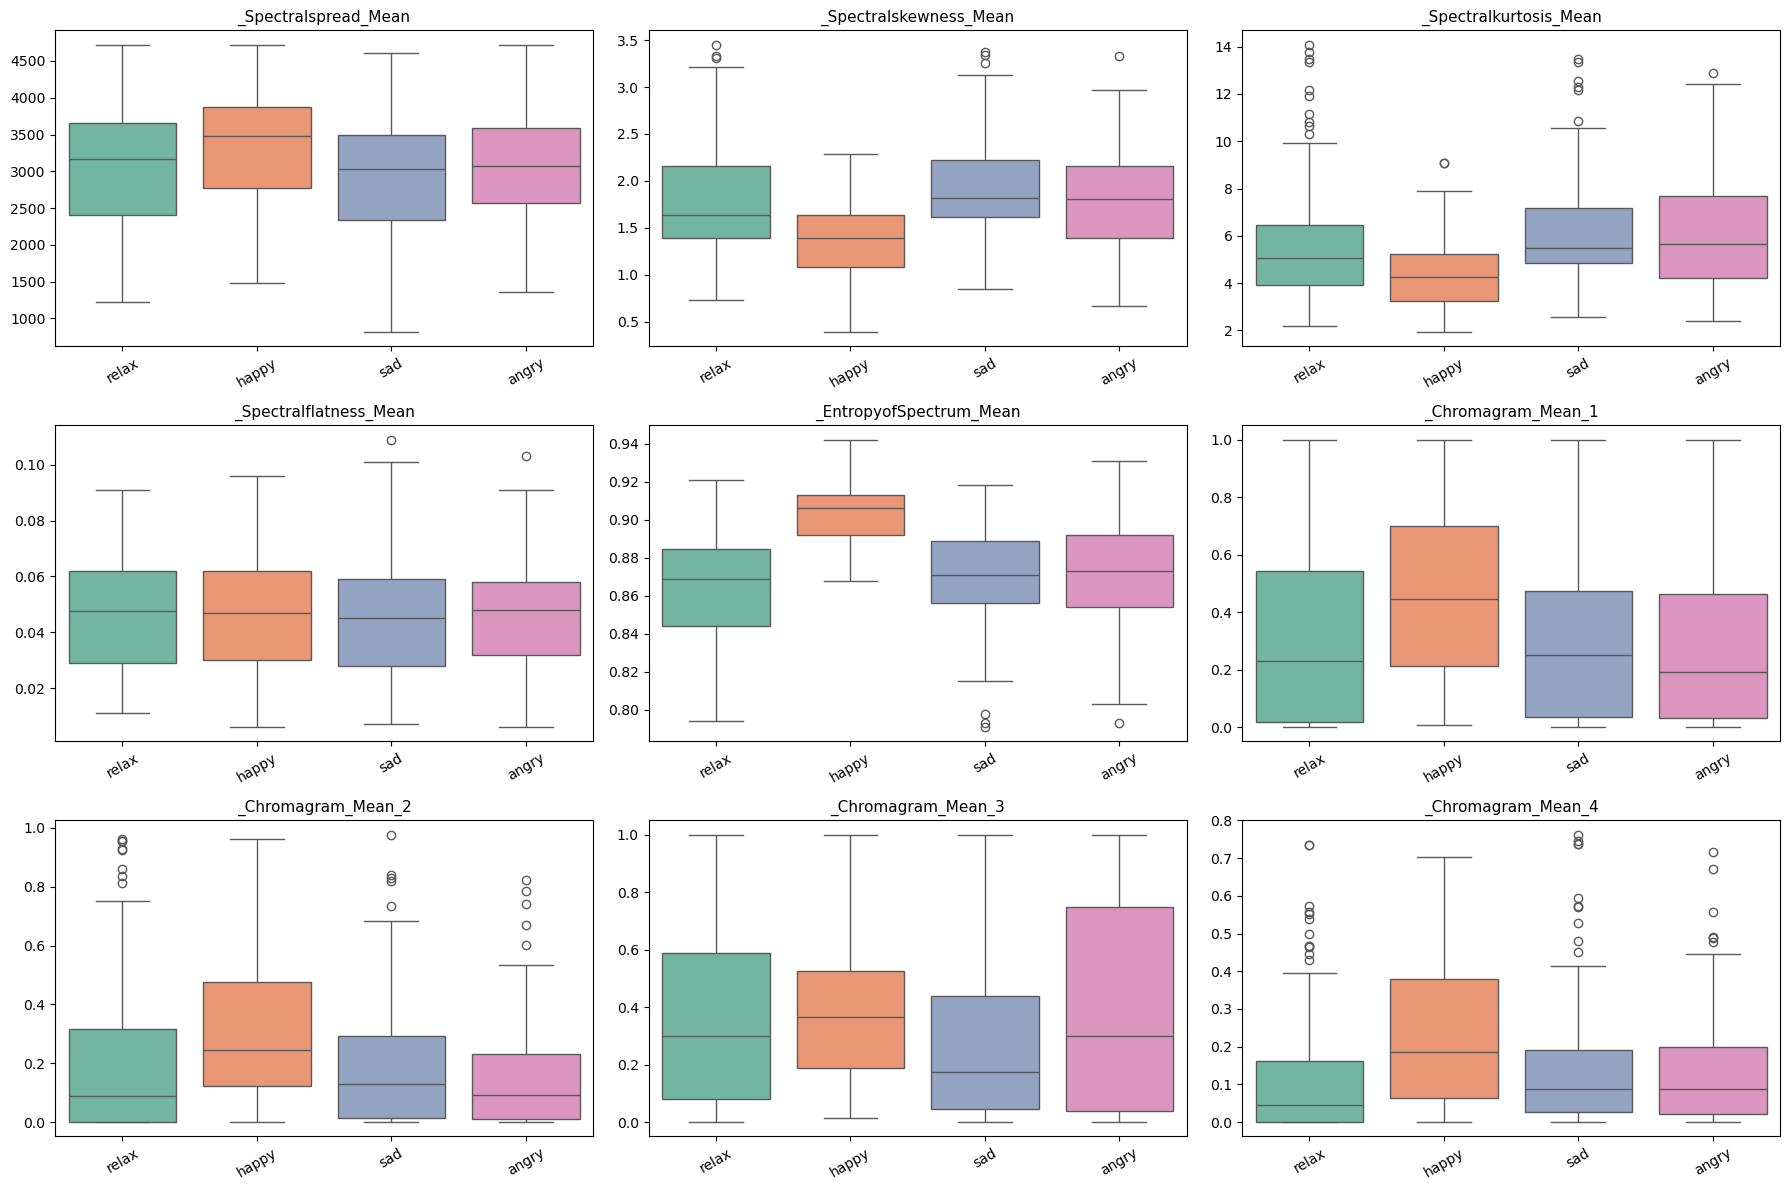

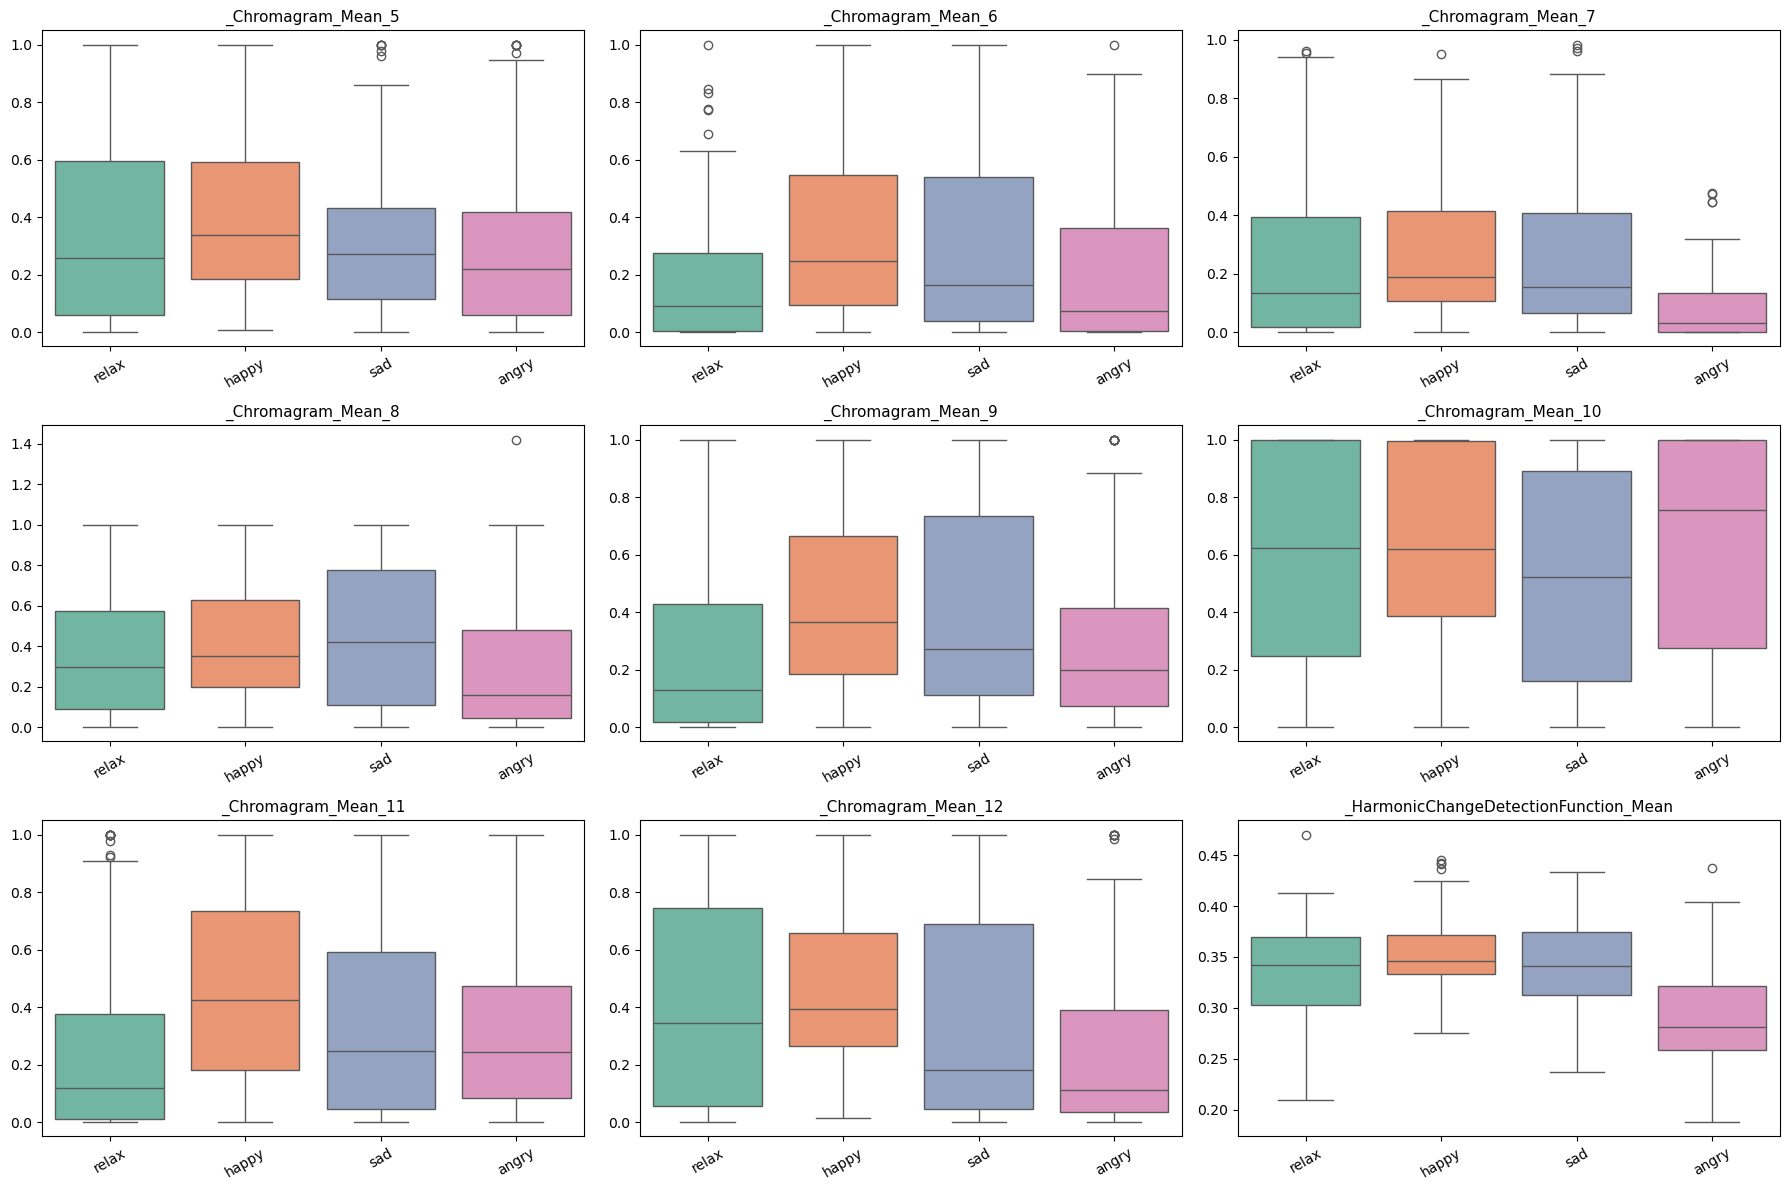

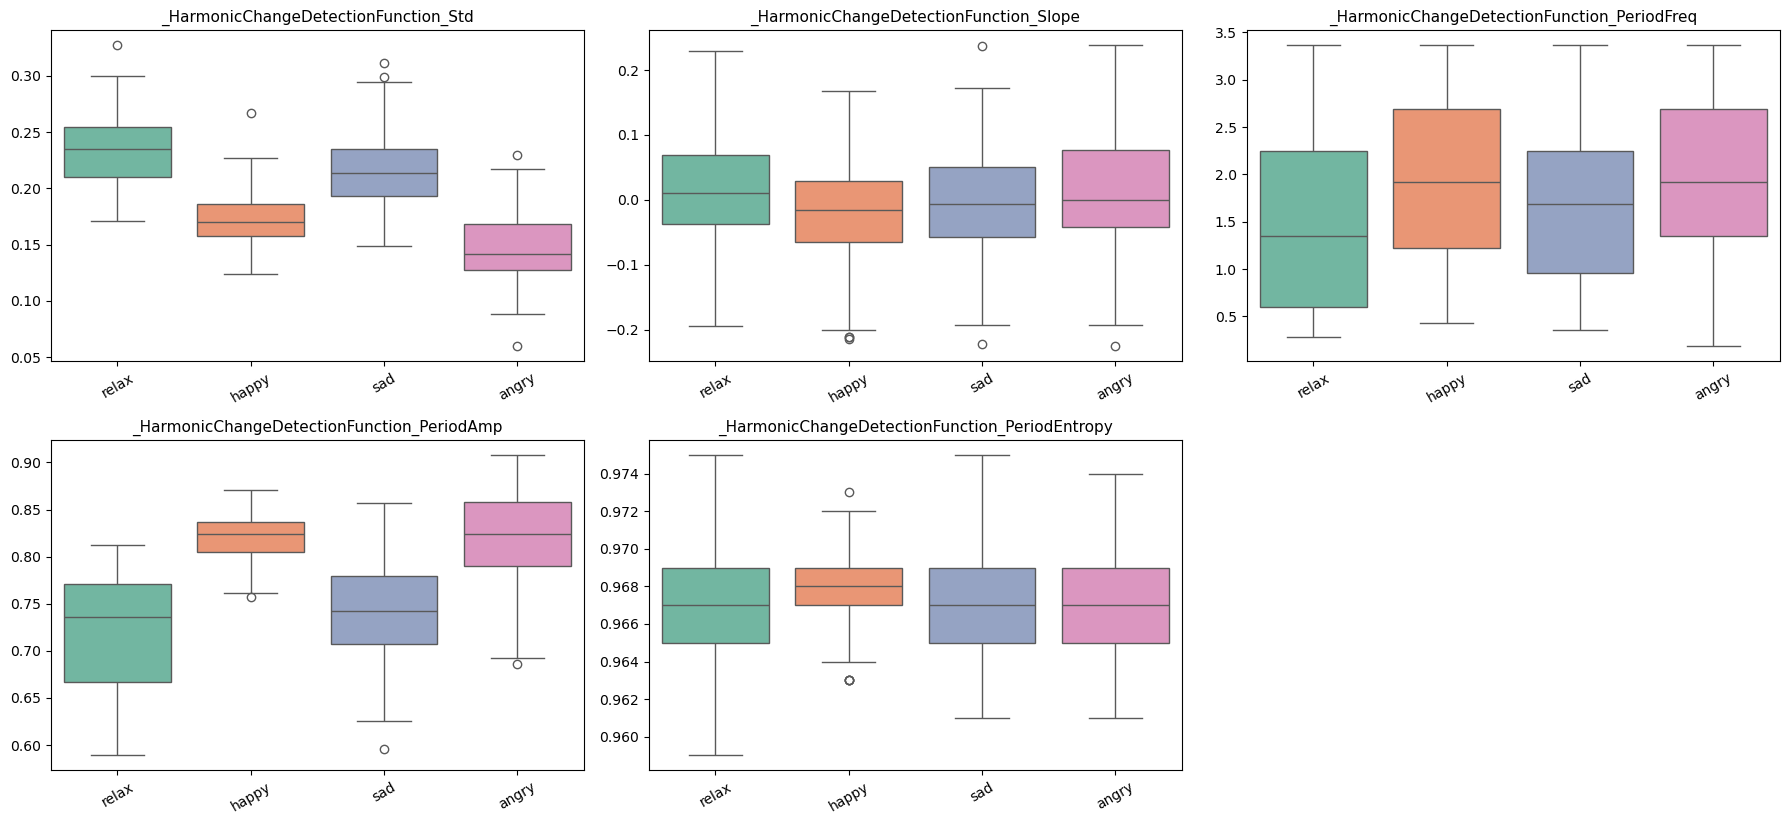

In [70]:
plot_boxplots_by_class(df_preprocessed, target_col="Class", n_cols=3, max_plots=9)

In [71]:
# from sklearn.decomposition import PCA
# import seaborn as sns
# import matplotlib.pyplot as plt

# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(df_preprocessed.drop(columns=["Class"]))
# df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
# df_pca["Class"] = df_preprocessed["Class"]

# sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Class", palette="Set2")
# plt.title("Proyección PCA de variables numéricas")
# plt.show()

## **Parte 3**. Preprocesamiento

In [73]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [74]:
# Separar features y target
X = df_preprocessed.drop(columns=["Class"])
y = df_preprocessed["Class"]

# Identificar columnas numéricas
numeric_features = X.select_dtypes(include=["number"]).columns.tolist()

# Pipeline para variables numéricas
numeric_transformer = Pipeline(steps=[
    ("power", PowerTransformer(method="yeo-johnson")),
    ("scaler", StandardScaler())
])

# Combinar transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ]
)

# Aplicar codificación a la variable objetivo (Class)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Aplicar pipeline de preprocesamiento
X_preprocessed = preprocessor.fit_transform(X)

# Convertir a DataFrame
X_preprocessed = pd.DataFrame(
    X_preprocessed,
    columns=numeric_features
)

print("Transformaciones completadas.")
print(f"X_preprocessed shape: {X_preprocessed.shape}")
print(f"Clases codificadas: {list(label_encoder.classes_)}")

Transformaciones completadas.
X_preprocessed shape: (401, 50)
Clases codificadas: ['angry', 'happy', 'relax', 'sad']


En resúmen lo que se ha realizado hasta aquí:
- Convertir variables tipo objeto en numéricas, las que no se pueden convertir se les asigna NaN.
- Limpieza de la variable objetivo "Class", esto es definir sólo 4 clases en total y eliminar los valores nulos.
- Eliminar columnas con tantos vacios que no aportan al modelo según referencias bibliográficas, como la columna "mixed_type_col".
- Eliminar duplicados.
- Detecta outliers en todas las columnas numéricas usando el método IQR, los reemplaza por NaN e imputa usando la mediana.
- Transformación de forma usando yeo-johnson y de escala con StandardScaler().

Sigue:
- Reducción dimencionalidad (por ejemplo PCA)

# **Tarea 5**. Construcción, ajuste y evaluación de Modelos de Machine Learning

- Split X_train, X_test, Y_train, Y_test
- Construcción, ajuste y evaluación de Modelos de Machine Learning